In [1]:
#Basic Libraries
#Import the essential tools for EDA

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
from pandas.api.types import CategoricalDtype

sb.set()

In [2]:
#Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

## DATA CLEANING

In [3]:
#What variables can be used to accurately predict cardiovascular disease for early intervention?

df = pd.read_csv('cardio_train.csv', sep=";")

#Converting age to years
df['age'] = df['age'].div(365).round().astype('int')

#Convert height and weight into BMI format and replacing both height and weight columns with BMI column
df['bmi'] = df['weight']/((df['height']/100)**2)
df=df.drop(['height','weight'],axis=1)

#Convert gender to binary: 0 for F, 1 for M
df["gender"] = df["gender"].replace({1: "0", 2: "1"})
df['gender'] = pd.to_numeric(df['gender'])

#Converting data on cholesterol and glucose levels 
df["cholesterol"] = df["cholesterol"].replace({1: "Normal", 2: "Above Normal", 3: "Well Above Normal"})
df["gluc"] = df["gluc"].replace({1: "Normal", 2: "Above Normal", 3: "Well Above Normal"})

#Standardised capitalisation
df.columns = df.columns.str.upper()

#Remove useless ID column
df.drop(columns = "ID", axis = 1, inplace=True)

df.head()

,AGE,GENDER,AP_HI,AP_LO,CHOLESTEROL,GLUC,SMOKE,ALCO,ACTIVE,CARDIO,BMI
0,50,1,110,80,Normal,Normal,0,0,1,0,21.967120
1,55,0,140,90,Well Above Normal,Normal,0,0,1,1,34.927679
2,52,0,130,70,Well Above Normal,Normal,0,0,0,1,23.507805
3,48,1,150,100,Normal,Normal,0,0,1,1,28.710479
4,48,0,100,60,Normal,Normal,0,0,0,0,23.011177


In [4]:
#Check if there are any missing values
display(df.isnull().any())

AGE            False
GENDER         False
AP_HI          False
AP_LO          False
CHOLESTEROL    False
GLUC           False
SMOKE          False
ALCO           False
ACTIVE         False
CARDIO         False
BMI            False
dtype: bool

In [5]:
#To ensure there are no duplicate data   
boolean = df.duplicated().any() 
boolean 

True

In [6]:
#Removing all the duplicates
df.drop_duplicates(keep=False, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63583 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          63583 non-null  int32  
 1   GENDER       63583 non-null  int64  
 2   AP_HI        63583 non-null  int64  
 3   AP_LO        63583 non-null  int64  
 4   CHOLESTEROL  63583 non-null  object 
 5   GLUC         63583 non-null  object 
 6   SMOKE        63583 non-null  int64  
 7   ALCO         63583 non-null  int64  
 8   ACTIVE       63583 non-null  int64  
 9   CARDIO       63583 non-null  int64  
 10  BMI          63583 non-null  float64
dtypes: float64(1), int32(1), int64(7), object(2)
memory usage: 5.6+ MB


In [7]:
#Check to ensure duplicated data removed
boolean = df.duplicated().any() 
boolean 

False

In [8]:
#display number of rows (data) and number of columns (variables)
df.shape

(63583, 11)

In [9]:
#Create a list that contains string name of numeric predictors
numPredictorList = ['AGE', 'AP_HI', 'AP_LO', 'BMI']

In [10]:
#Display summary of numeric variable
#Provide a basic insight of how the variables are distributed by looking its std, min, max, mean, median, and quartile
df[numPredictorList].describe()

,AGE,AP_HI,AP_LO,BMI
count,63583.000000,63583.000000,63583.000000,63583.000000
mean,53.389444,129.663998,98.343409,27.799397
std,6.828849,161.557820,197.669472,6.281424
min,30.000000,-150.000000,-70.000000,3.471784
25%,48.000000,120.000000,80.000000,23.936062
50%,54.000000,120.000000,80.000000,26.722873
75%,59.000000,140.000000,90.000000,30.666667
max,65.000000,16020.000000,11000.000000,298.666667


In [11]:
#Numeric variables contain data that don't make sense, let's see what we can do about it.
def plotbox(label):
    sb.boxplot(x=label, data=df)
    plt.title(f'{label}')

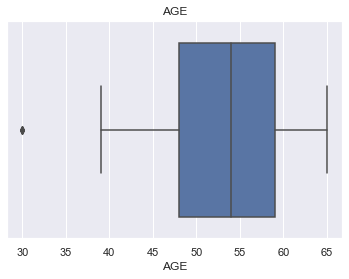

In [12]:
plotbox('AGE')

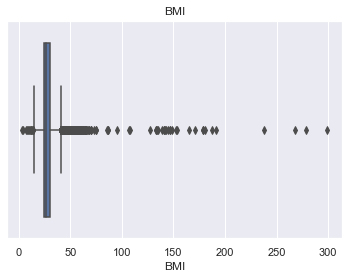

In [13]:
plotbox('BMI')

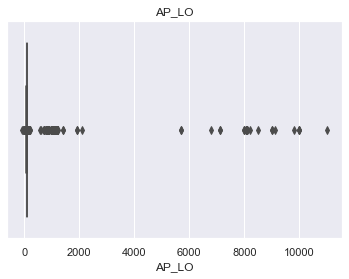

In [14]:
plotbox('AP_LO')

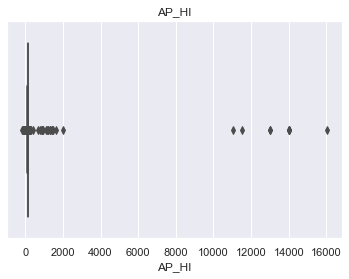

In [15]:
plotbox('AP_HI')

<AxesSubplot:>

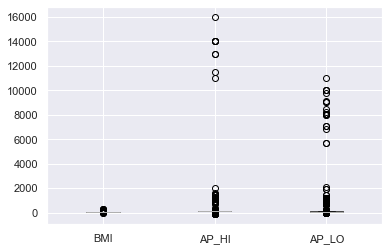

In [16]:
numeric_col = ['BMI', 'AP_HI', 'AP_LO']
df.boxplot(numeric_col)

In [17]:
#Removing nonsensical values
def remove_outliers(label):
    q75,q25 = np.percentile(df[label],[75,25])
    intr_qr = q75-q25
    
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df.loc[df[label] < min,label] = np.nan
    df.loc[df[label] > max,label] = np.nan
    df.isnull().sum()

In [18]:
remove_outliers('BMI')
df = df.dropna(axis = 0)
remove_outliers('AP_LO')
df = df.dropna(axis = 0)
remove_outliers('AP_HI')
df = df.dropna(axis = 0)

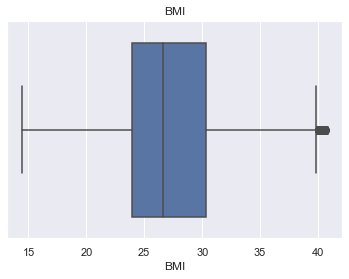

In [19]:
plotbox('BMI')

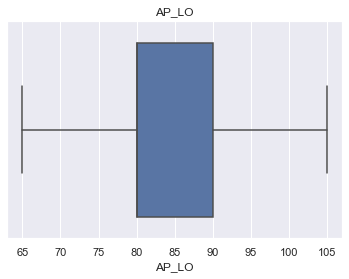

In [20]:
plotbox('AP_LO')

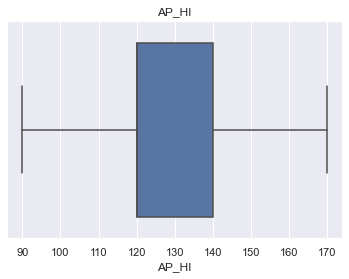

In [21]:
plotbox('AP_HI')

In [22]:
df[numPredictorList].describe()

,AGE,AP_HI,AP_LO,BMI
count,56744.000000,56744.000000,56744.000000,56744.000000
mean,53.449087,127.112029,81.926230,27.330825
std,6.816557,14.801914,7.969996,4.613312
min,30.000000,90.000000,65.000000,14.479500
25%,48.000000,120.000000,80.000000,23.918830
50%,54.000000,120.000000,80.000000,26.609713
75%,59.000000,140.000000,90.000000,30.299205
max,65.000000,170.000000,105.000000,40.760870


In [23]:
#Taking a look at updated dataset without nonsense values
df

,AGE,GENDER,AP_HI,AP_LO,CHOLESTEROL,GLUC,SMOKE,ALCO,ACTIVE,CARDIO,BMI
0,50,1,110.0,80.0,Normal,Normal,0,0,1,0,21.967120
1,55,0,140.0,90.0,Well Above Normal,Normal,0,0,1,1,34.927679
2,52,0,130.0,70.0,Well Above Normal,Normal,0,0,0,1,23.507805
3,48,1,150.0,100.0,Normal,Normal,0,0,1,1,28.710479
5,60,0,120.0,80.0,Above Normal,Above Normal,0,0,0,0,29.384676
...,...,...,...,...,...,...,...,...,...,...,...
69993,54,0,130.0,90.0,Normal,Normal,0,0,1,1,23.661439
69994,58,0,150.0,80.0,Normal,Normal,0,0,1,1,29.384757
69995,53,1,120.0,80.0,Normal,Normal,1,0,1,0,26.927438
69998,61,0,135.0,80.0,Normal,Above Normal,0,0,0,1,27.099251


In [24]:
#Double Check to ensure there isn't any missing data
display(df.isnull().any())

AGE            False
GENDER         False
AP_HI          False
AP_LO          False
CHOLESTEROL    False
GLUC           False
SMOKE          False
ALCO           False
ACTIVE         False
CARDIO         False
BMI            False
dtype: bool

In [25]:
#Double check if there is any duplicate data
boolean = df.duplicated().any() 
boolean 

False

In [26]:
#Copying data set for data processing later on
df_copy = df.copy(deep = True)
df_copy.to_csv("cardio_train_clean.csv")

## Exploratory Data Analysis (EDA)

In [27]:
#Univariate analysis for numeric variables
#Plot histogram, violinplot
#x-axis is the numeric variable
#y-axis is the frequency (histogram) or density(violin)
def uniNumAnalysis (string,df):
    strY = 'BMI'
    f, axes = plt.subplots(1, 2, figsize=(18, 4))
    sb.violinplot(data = df[string], orient = "h", ax = axes[0])
    sb.histplot(data = df[string], ax = axes[1])

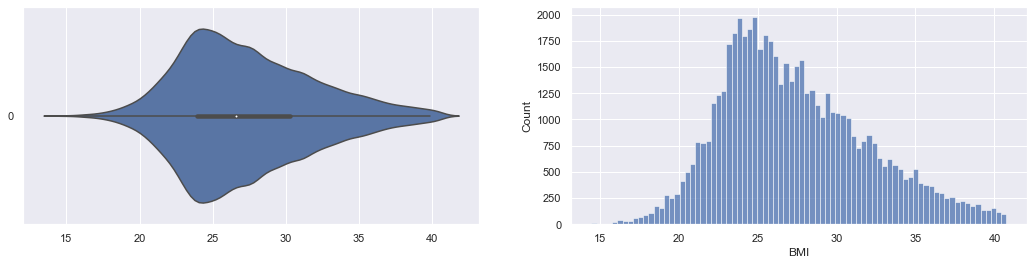

In [28]:
uniNumAnalysis('BMI',df)

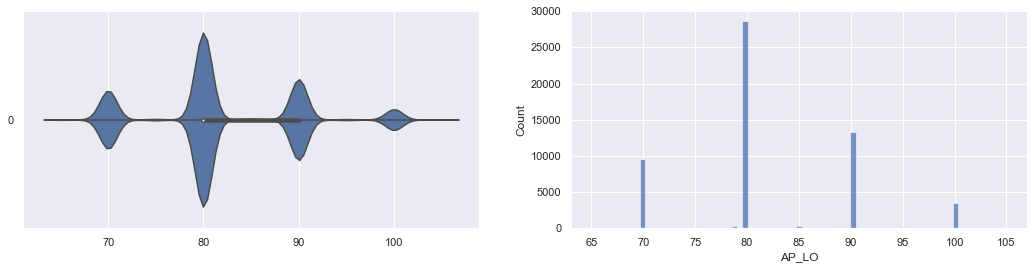

In [29]:
uniNumAnalysis('AP_LO',df)

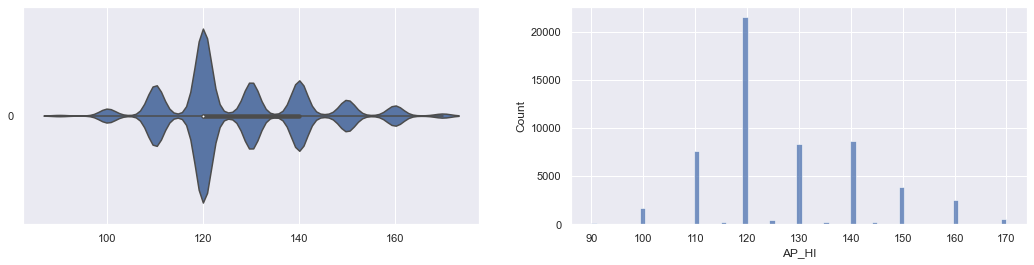

In [30]:
uniNumAnalysis('AP_HI',df)

In [31]:
#Univariate analysis for binary variables
#Plot categoric plot
#x-axis is categoric variable
#y-axis is the cardinality
def uniBinAnalysis (string,df,state1,state2):
    f = plt.figure(figsize=(16,8))
    sb.catplot(y=string,data=df,kind='count')
    no,yes = df[string].value_counts()
    print("Ratio of classes is \n",state1,' : ',state2,' =\n', no, ":", yes)

Ratio of classes is 
 Have Cardio Disease  :  Don't have Cardio Disease  =
 29494 : 27250


<Figure size 1152x576 with 0 Axes>

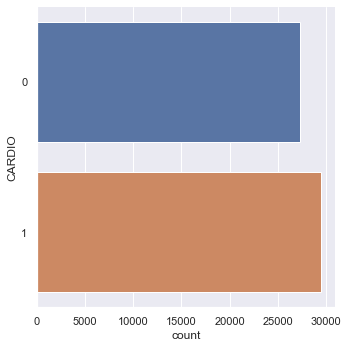

In [32]:
uniBinAnalysis("CARDIO",df,"Have Cardio Disease","Don't have Cardio Disease")

#Sample balances out pretty evenly, no need for sampling (Upsampling/Downsampling)

Ratio of classes is 
 Doesn't Smoke  :  Smokes  =
 51223 : 5521


<Figure size 1152x576 with 0 Axes>

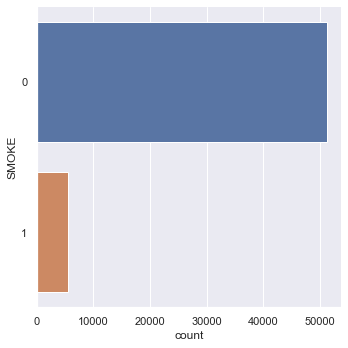

In [33]:
uniBinAnalysis("SMOKE",df,"Doesn't Smoke","Smokes")

Ratio of classes is 
 Doesn't drink  :  Drinks  =
 53411 : 3333


<Figure size 1152x576 with 0 Axes>

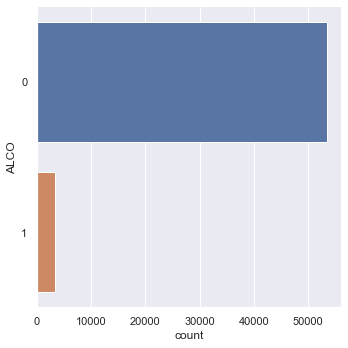

In [34]:
uniBinAnalysis('ALCO',df,"Doesn't drink",'Drinks')

Ratio of classes is 
 Active  :  Not Active  =
 44981 : 11763


<Figure size 1152x576 with 0 Axes>

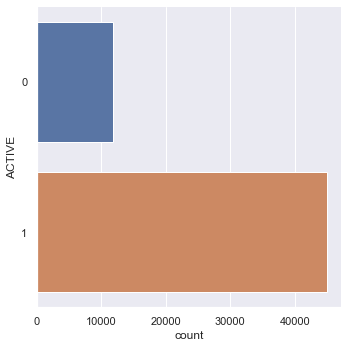

In [35]:
uniBinAnalysis('ACTIVE',df,'Active','Not Active')

Ratio of classes is 
 Female  :  Male  =
 35691 : 21053


<Figure size 1152x576 with 0 Axes>

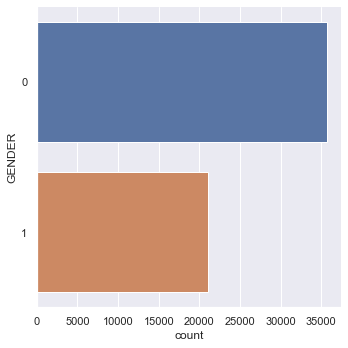

In [36]:
uniBinAnalysis('GENDER',df,'Female','Male')

In [37]:
#Univariate analysis for categoric variables
#Display the cardinality of each category of variables
#Plot categoric plot
#x-axis is the categoric variable (categories are sorted according to the list passed)
#y-axis is the cardinality
def uniCatAnalysis (string,df,sortList):
    display(df[string].value_counts())
    
    df_temp = df
    catType = CategoricalDtype(categories = sortList, ordered = True)
    df_temp[string] = df_temp[string].astype(catType)

    sb.catplot(y = string, data = df_temp, kind = "count")

Normal               47589
Well Above Normal     4673
Above Normal          4482
Name: GLUC, dtype: int64

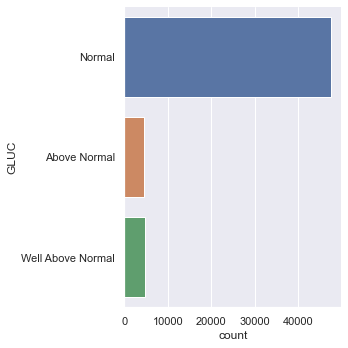

In [38]:
uniCatAnalysis('GLUC',df,['Normal', 'Above Normal', 'Well Above Normal'])

Normal               41428
Above Normal          8274
Well Above Normal     7042
Name: CHOLESTEROL, dtype: int64

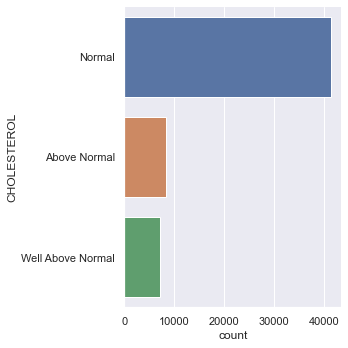

In [39]:
uniCatAnalysis('CHOLESTEROL',df,['Normal', 'Above Normal', 'Well Above Normal'])

In [40]:
# Bivariate Exploration

# Do binary analysis between a categoric variable and response variable, "CARDIO"
# Heatmap of number of people under different conditions are displayed
# Then a grouped bar chart is displayed for better visualization of difference between people have and don't have cardio disease
def biCatAnalysis(strY,df):
    print(strY+" against CARDIO")
    f = plt.figure(figsize=(16,8))
    sb.heatmap(df.groupby(['CARDIO', strY]).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
    f = plt.figure(figsize=(16,8))
    sb.countplot(y=strY,hue='CARDIO',data=df)    

In [41]:
#Print the list of probability of having heart disease when variable = 0 and variable = 1
#return list of probability
def returnListOfProbability(strY,df,state1,state2):
    prob = []
    df0 = df[df[strY]==0]
    df1 = df[df[strY]==1]
    prob.append(sum(df0['CARDIO']==1) / df0[strY].count())
    prob.append(sum(df1['CARDIO']==1) / df1[strY].count())
    print(state1,": Probability of having Cardio Disease:",prob[0])
    print(state2,": Probability of having Cardio Disease:",prob[1])
    return prob

In [42]:
#Create a list that contains string name of categoric variables
catPredictorList = ['SMOKE', 'ALCO', 'ACTIVE','GENDER', 'GLUC', 'CHOLESTEROL']

GENDER against CARDIO
F : Probability of having Cardio Disease: 0.5241657560729596
M : Probability of having Cardio Disease: 0.5123260342943998


[Text(0.5, 0, 'GENDER'), Text(0, 0.5, 'Probability of getting cardio disease')]

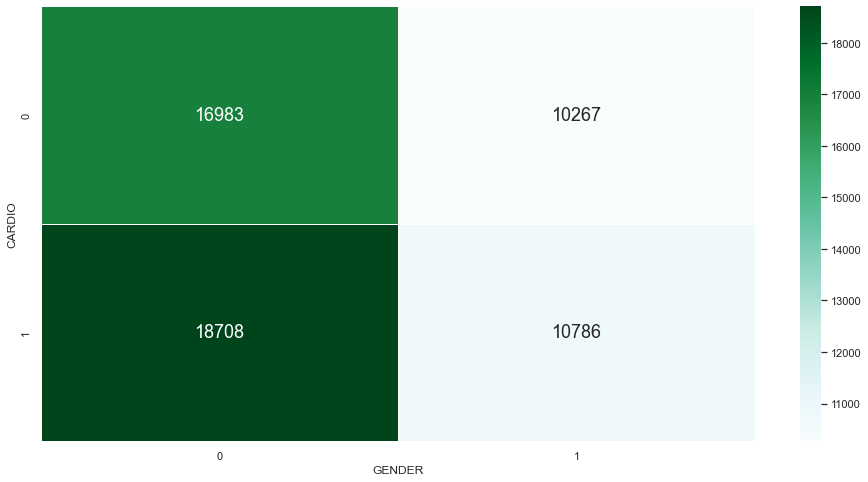

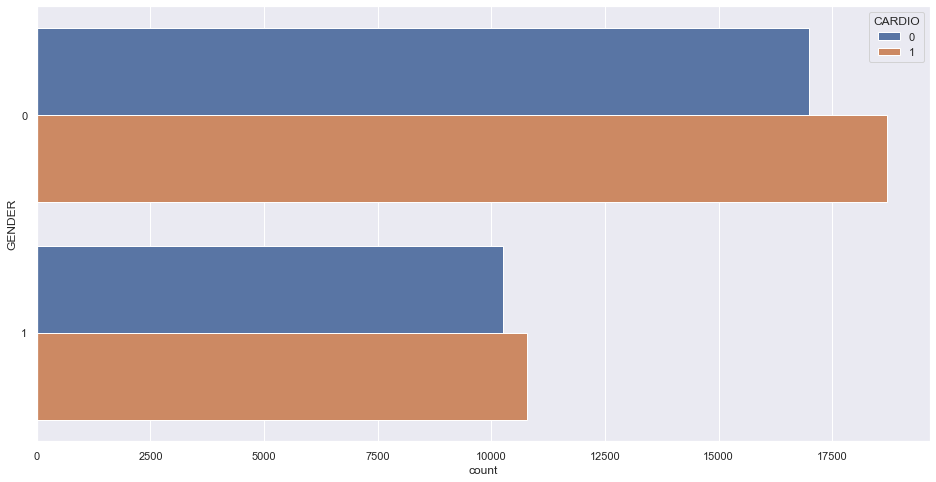

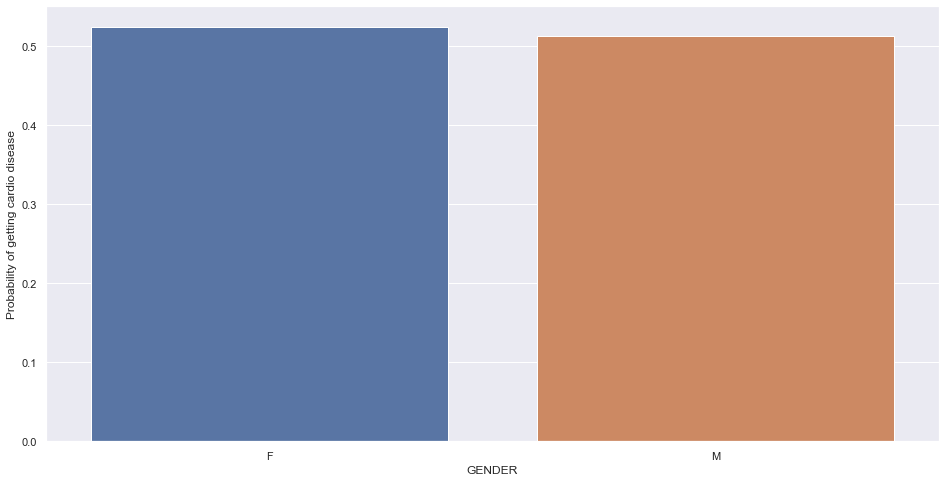

In [43]:
string = catPredictorList[3]
biCatAnalysis(string,df)
prob = []
prob.extend(returnListOfProbability(string,df,"F","M"))

labels = ["F","M"]
f = plt.figure(figsize=(16,8))
ax = sb.barplot(x=labels,y=prob)
ax.set(xlabel=string,ylabel="Probability of getting cardio disease")

SMOKE against CARDIO
Doesn't SMOKE : Probability of having Cardio Disease: 0.5253304179762998
Does SMOKE : Probability of having Cardio Disease: 0.46821228038398843


[Text(0.5, 0, 'SMOKE'), Text(0, 0.5, 'Probability of getting cardio disease')]

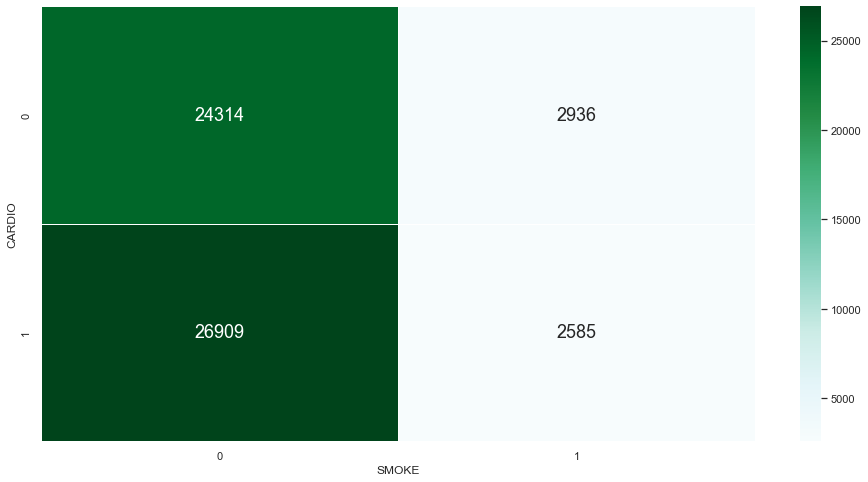

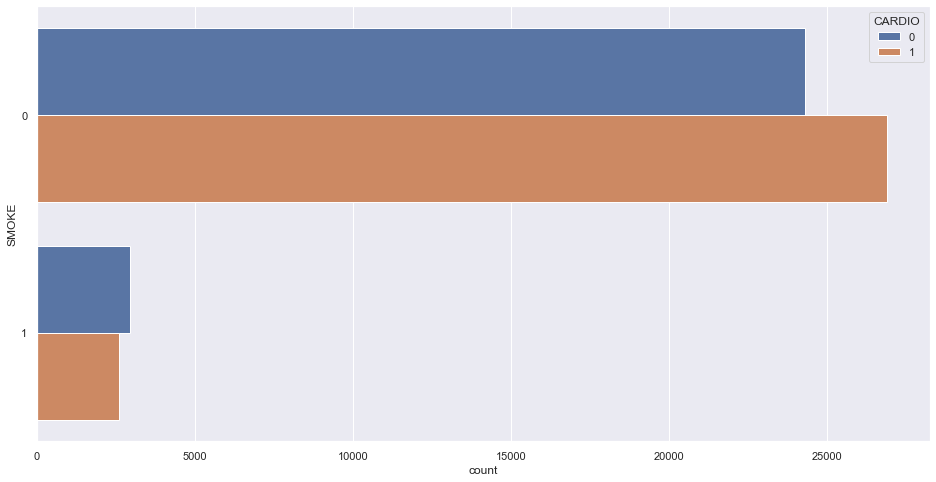

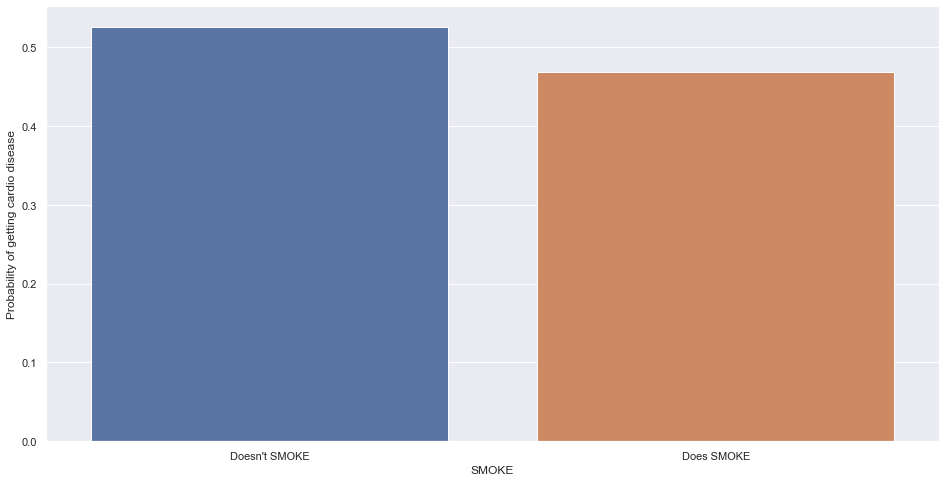

In [44]:
strY = catPredictorList[0]
biCatAnalysis(strY,df)
prob = []
prob.extend(returnListOfProbability(strY,df,"Doesn't "+strY,"Does "+strY))

labels = ["Doesn't "+strY,"Does "+strY]
f = plt.figure(figsize=(16,8))
ax = sb.barplot(x=labels,y=prob)
ax.set(xlabel=strY,ylabel="Probability of getting cardio disease")

ALCO against CARDIO
Doesn't drink ALCO : Probability of having Cardio Disease: 0.5227574844133231
Drinks ALCO : Probability of having Cardio Disease: 0.47194719471947194


[Text(0.5, 0, 'ALCO'), Text(0, 0.5, 'Probability of getting cardio disease')]

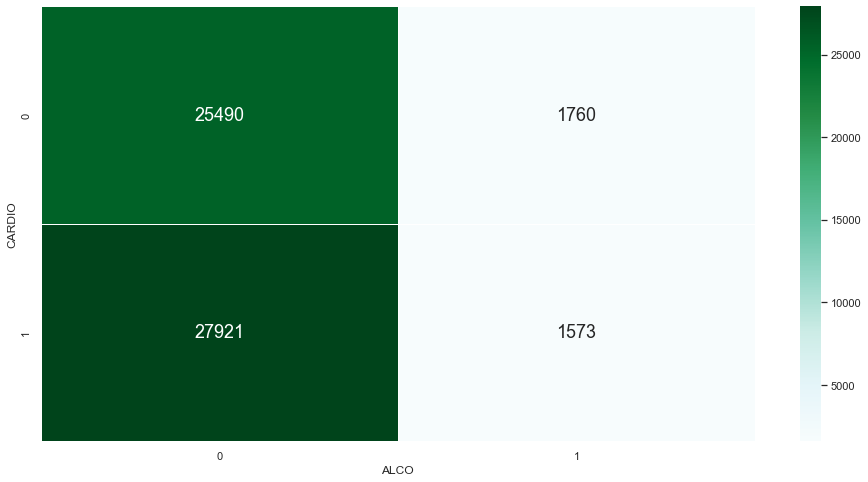

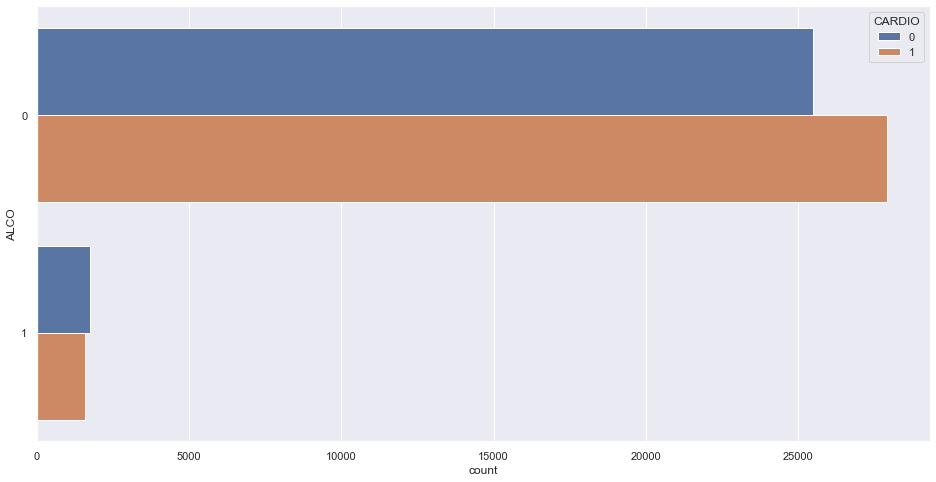

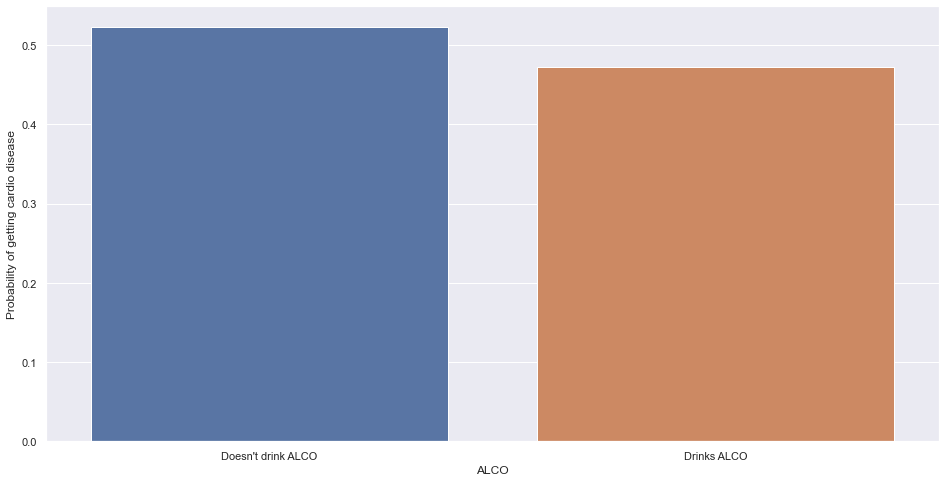

In [45]:
strY = catPredictorList[1]
biCatAnalysis(strY,df)
prob = []
prob.extend(returnListOfProbability(strY,df,"Doesn't drink "+strY,"Drinks "+strY))

labels = ["Doesn't drink "+strY,"Drinks "+strY]
f = plt.figure(figsize=(16,8))
ax = sb.barplot(x=labels,y=prob)
ax.set(xlabel=strY,ylabel="Probability of getting cardio disease")

ACTIVE against CARDIO
Not ACTIVE : Probability of having Cardio Disease: 0.5410184476749129
Is ACTIVE : Probability of having Cardio Disease: 0.5142171138925324


[Text(0.5, 0, 'ACTIVE'), Text(0, 0.5, 'Probability of getting cardio disease')]

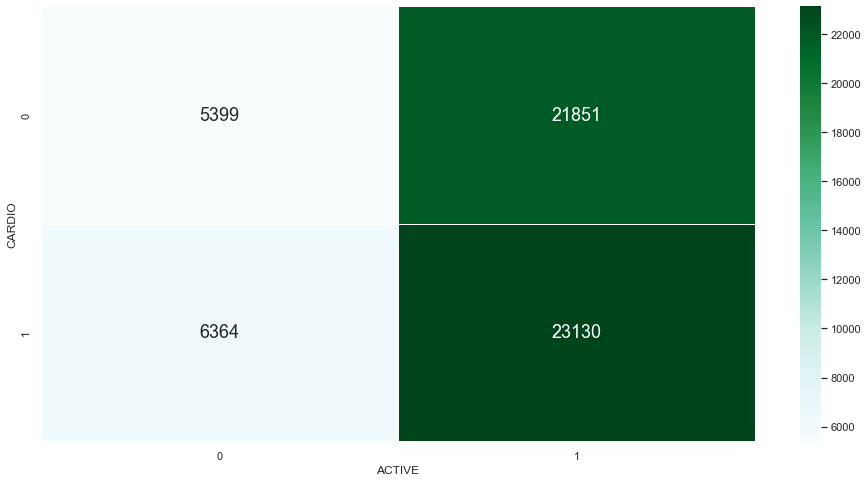

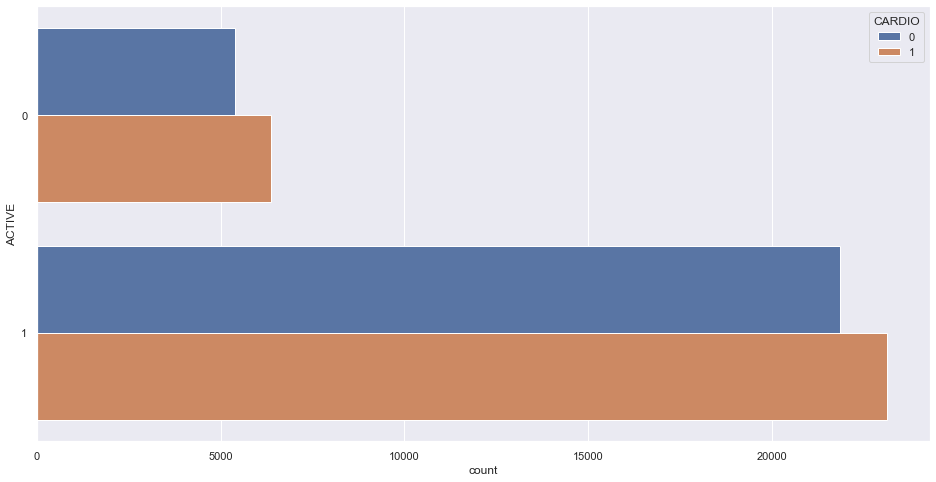

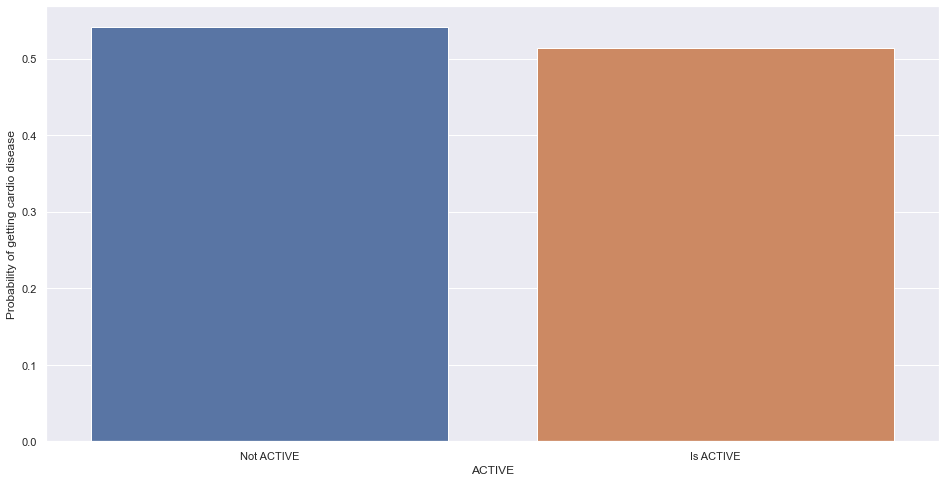

In [46]:
strY = catPredictorList[2]
biCatAnalysis(strY,df)
prob = []
prob.extend(returnListOfProbability(strY,df,"Not "+strY,"Is "+strY))

labels = ["Not "+strY,"Is "+strY]
f = plt.figure(figsize=(16,8))
ax = sb.barplot(x=labels,y=prob)
ax.set(xlabel=strY,ylabel="Probability of getting cardio disease")

GLUC against CARDIO
Normal : Probability of having Cardio Disease: 0.5046964634684485
Above Normal : Probability of having Cardio Disease: 0.5807675145024542
Well Above Normal : Probability of having Cardio Disease: 0.6148084742135673


[Text(0.5, 0, 'Glucose'),
 Text(0, 0.5, 'Probability of getting cardio disease')]

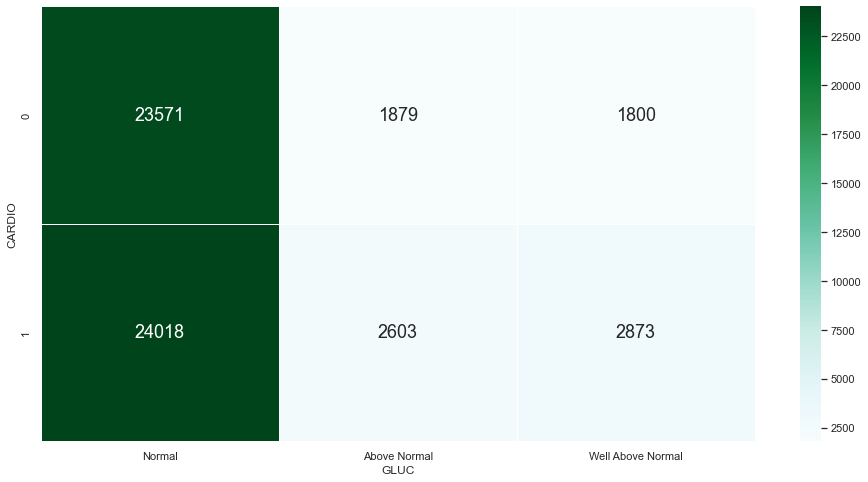

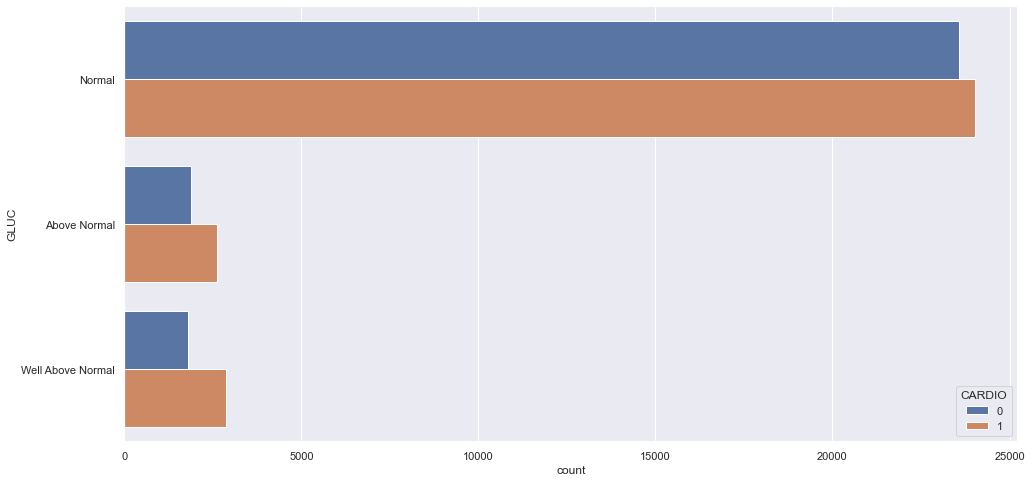

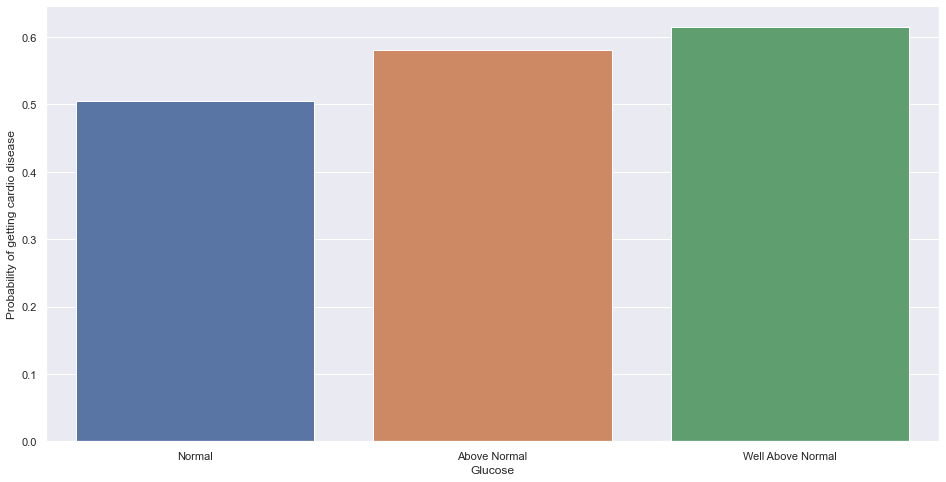

In [47]:
strY = catPredictorList[4]
biCatAnalysis(strY,df)
df0 = df[df[strY]=='Normal']
df1 = df[df[strY]=='Above Normal']
df2 = df[df[strY]=='Well Above Normal']

############

labels = ['Normal','Above Normal','Well Above Normal']

y1 = [sum(df0['CARDIO']==0), sum(df1['CARDIO']==0),
      sum(df2['CARDIO']==0)]

y2 = [sum(df0['CARDIO']==1), sum(df1['CARDIO']==1),
      sum(df2['CARDIO']==1)]

probability = []
for i in range(len(y1)):
    probability.append(y2[i]/(y1[i]+y2[i]))
    print(labels[i],": Probability of having Cardio Disease:",probability[i])

f = plt.figure(figsize=(16,8))
ax = sb.barplot(x=labels,y=probability)
ax.set(xlabel="Glucose",ylabel="Probability of getting cardio disease")

CHOLESTEROL against CARDIO
Normal : Probability of having Cardio Disease: 0.46330983875639664
Above Normal : Probability of having Cardio Disease: 0.5963258399806624
Well Above Normal : Probability of having Cardio Disease: 0.7619994319795512


[Text(0.5, 0, 'Cholesterol'),
 Text(0, 0.5, 'Probability of getting cardio disease')]

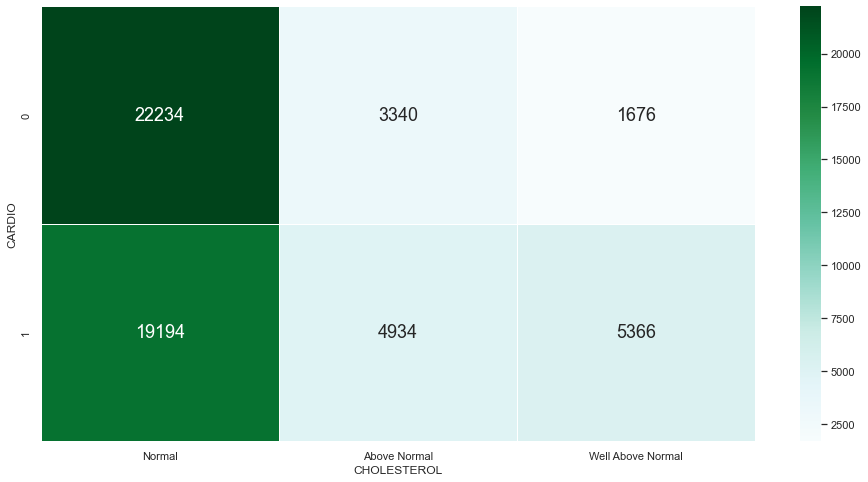

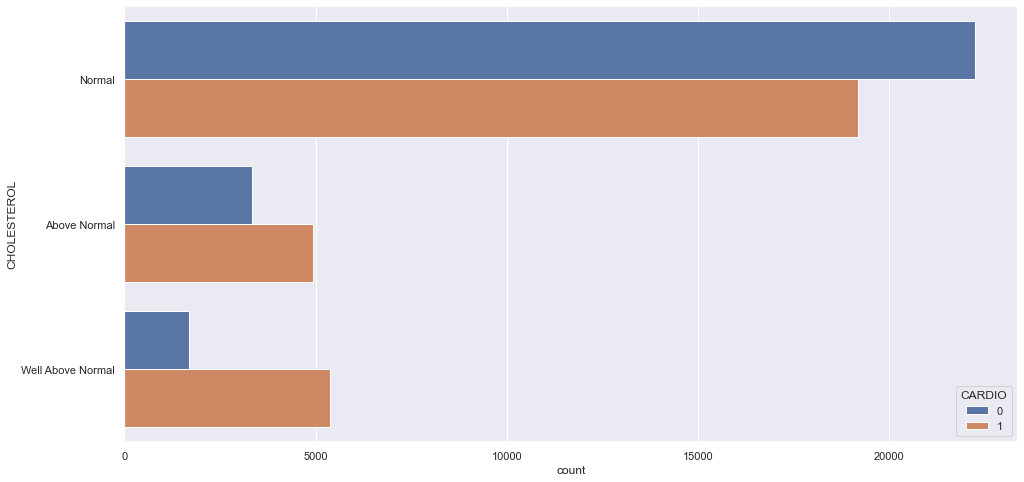

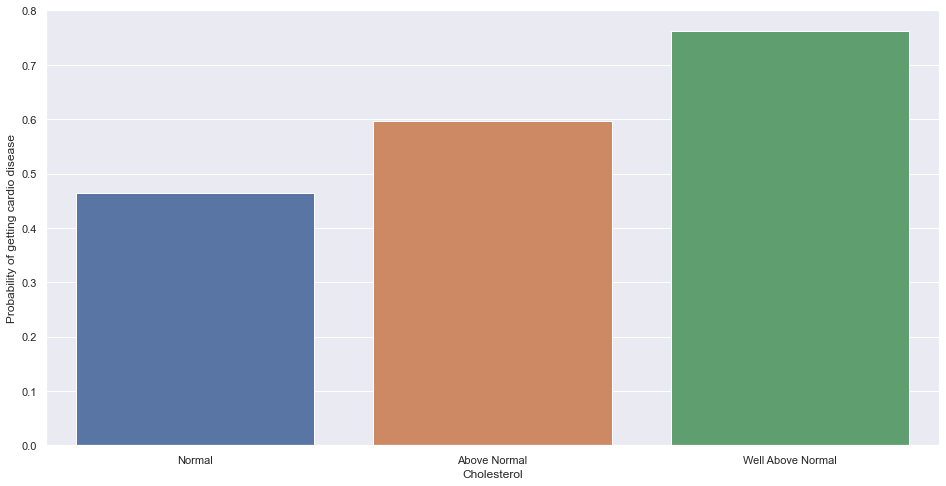

In [48]:
strY = catPredictorList[5]
biCatAnalysis(strY,df)
df0 = df[df[strY]=='Normal']
df1 = df[df[strY]=='Above Normal']
df2 = df[df[strY]=='Well Above Normal']

############

labels = ['Normal','Above Normal','Well Above Normal']

y1 = [sum(df0['CARDIO']==0), sum(df1['CARDIO']==0),
      sum(df2['CARDIO']==0)]

y2 = [sum(df0['CARDIO']==1), sum(df1['CARDIO']==1),
      sum(df2['CARDIO']==1)]

probability = []
for i in range(len(y1)):
    probability.append(y2[i]/(y1[i]+y2[i]))
    print(labels[i],": Probability of having Cardio Disease:",probability[i])

f = plt.figure(figsize=(16,8))
ax = sb.barplot(x=labels,y=probability)
ax.set(xlabel="Cholesterol",ylabel="Probability of getting cardio disease")

In [49]:
#Checking correlation between numeric values such as BMI, age, systolic and diastolic blood pressure and those that have cardio disease.

def biNumAnalysis(strY,df):
    f = plt.figure(figsize=(16, 8))
    sb.boxplot(x = 'CARDIO',y = strY, data = df)

    f = plt.figure(figsize=(16, 8))
    sb.stripplot(x = 'CARDIO',y = strY, data = df)

    f = plt.figure(figsize=(16, 8))
    sb.violinplot(x = 'CARDIO',y = strY, data = df)
    
    f, ax = plt.subplots(figsize=(16, 8))
    plt.title('Distribution of '+strY, fontsize = 18)
    sb.kdeplot(df[df["CARDIO"]==1][strY],shade="True",color ="black",label="Have CardioDisease")
    sb.kdeplot(df[df["CARDIO"]==0][strY],shade="True",color = "grey",label="No CardioDisease")
    ax.legend();
    plt.show()

In [50]:
#Shifting CARDIO column to first position
first_column = df.pop('CARDIO')
df.insert(0, 'CARDIO', first_column)
df.head()

,CARDIO,AGE,GENDER,AP_HI,AP_LO,CHOLESTEROL,GLUC,SMOKE,ALCO,ACTIVE,BMI
0,0,50,1,110.0,80.0,Normal,Normal,0,0,1,21.967120
1,1,55,0,140.0,90.0,Well Above Normal,Normal,0,0,1,34.927679
2,1,52,0,130.0,70.0,Well Above Normal,Normal,0,0,0,23.507805
3,1,48,1,150.0,100.0,Normal,Normal,0,0,1,28.710479
5,0,60,0,120.0,80.0,Above Normal,Above Normal,0,0,0,29.384676


<AxesSubplot:>

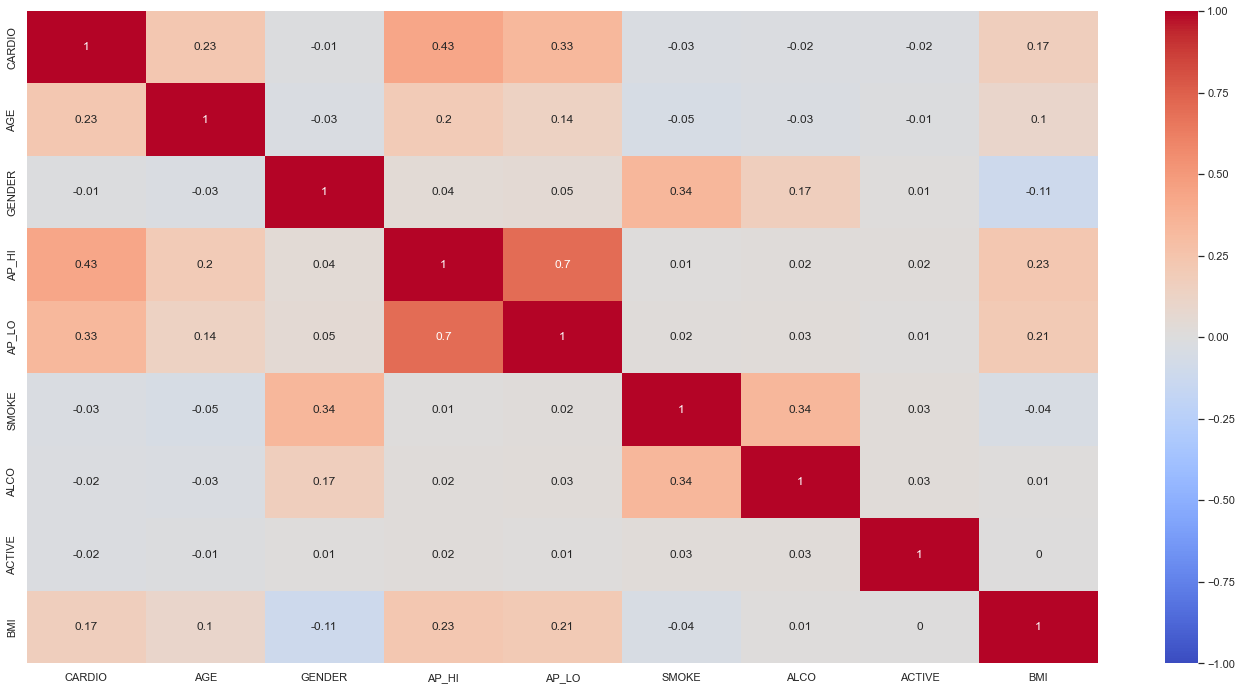

In [51]:
#Plotting heatmap
correlation = df.corr().round(2)
plt.figure(figsize = (24,12))
sb.heatmap(correlation, annot = True, cmap = 'coolwarm',vmin=-1,vmax=1)

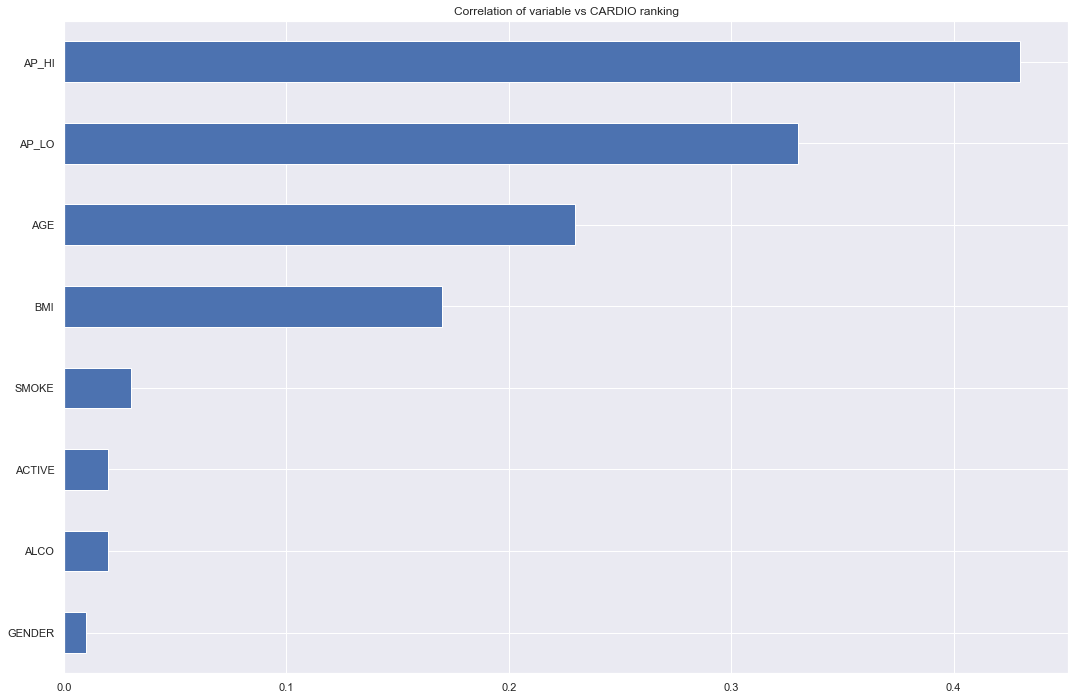

In [52]:
#Plotting correlation graph

plt.figure(figsize = (18,12))
plt.title('Correlation of variable vs CARDIO ranking')
abs(correlation['CARDIO']).sort_values()[:-1].plot.barh()
plt.show()

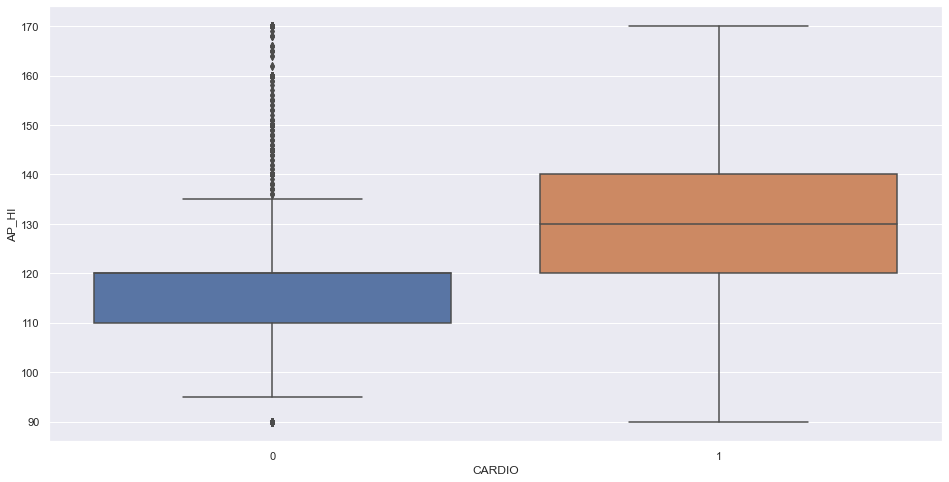

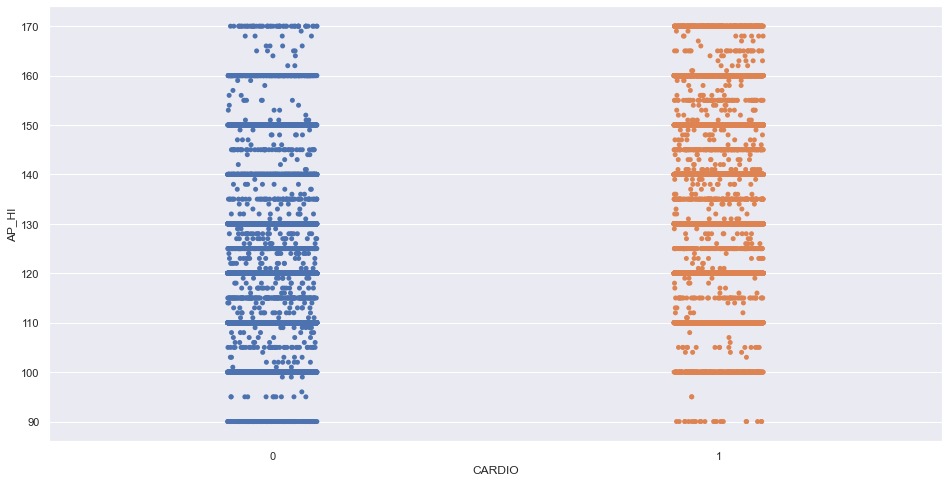

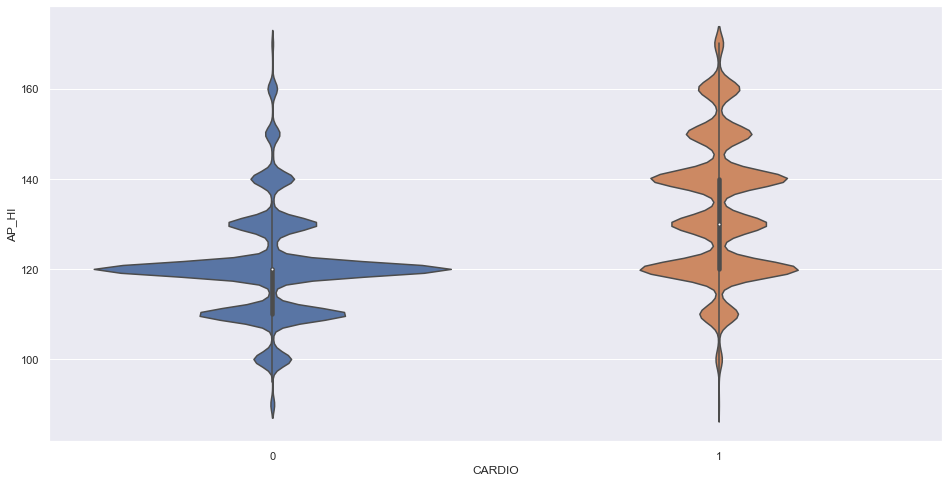

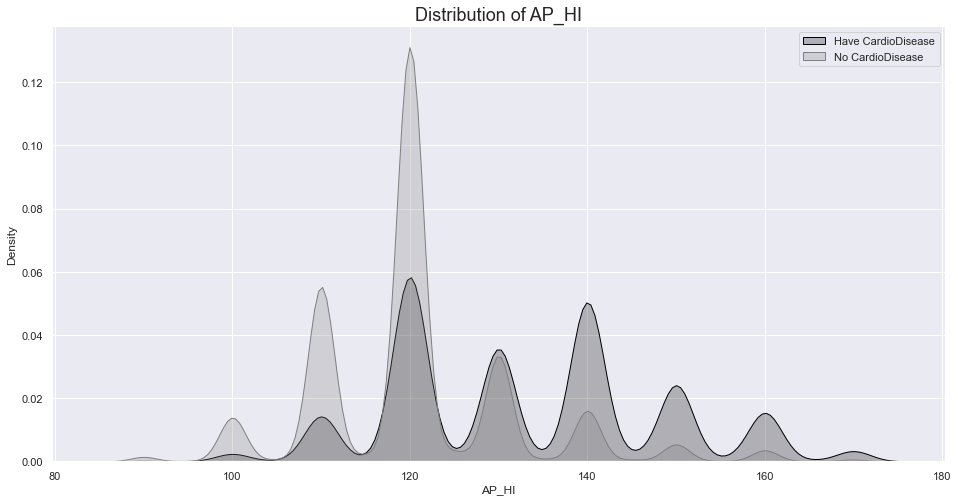

In [53]:
biNumAnalysis('AP_HI',df)

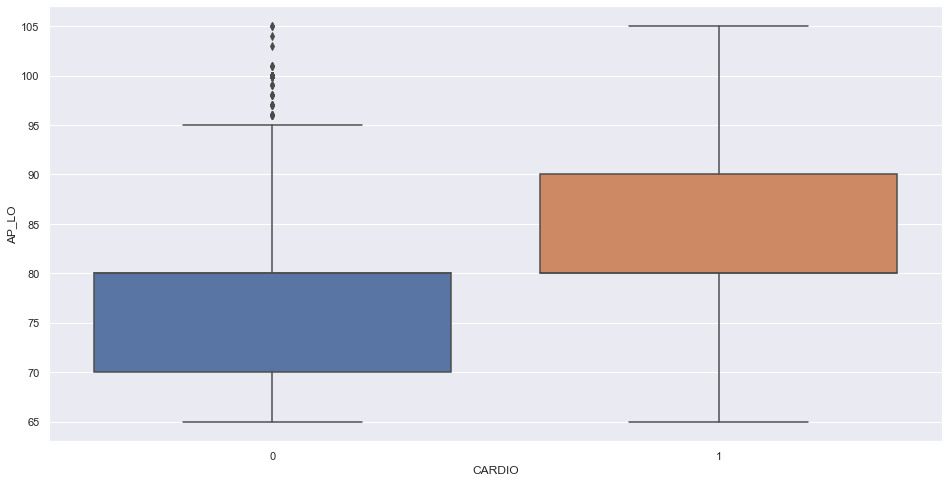

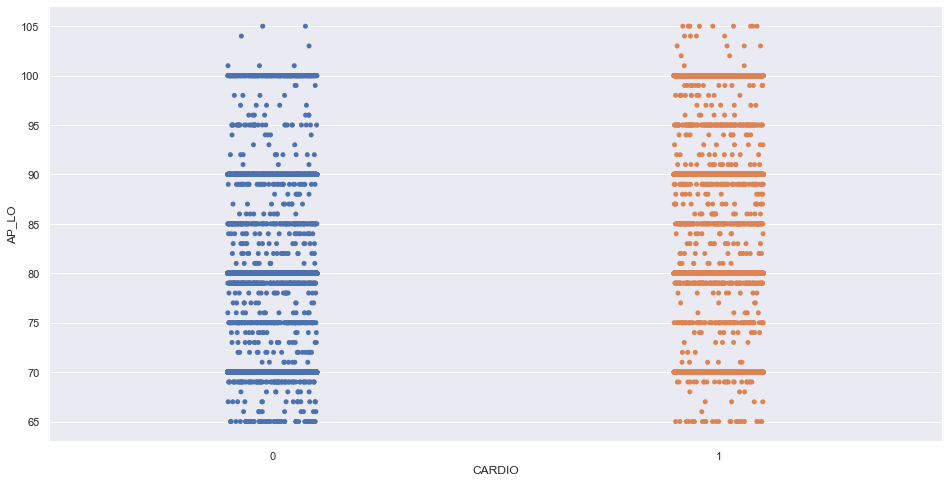

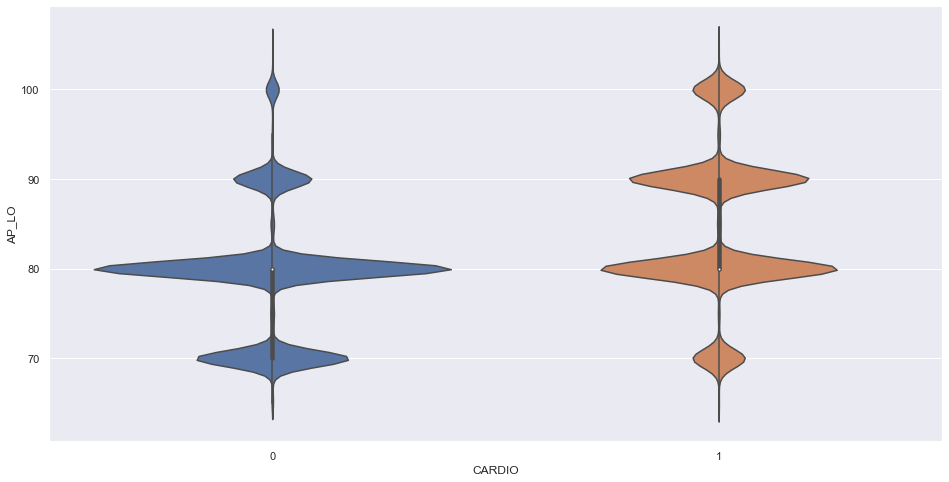

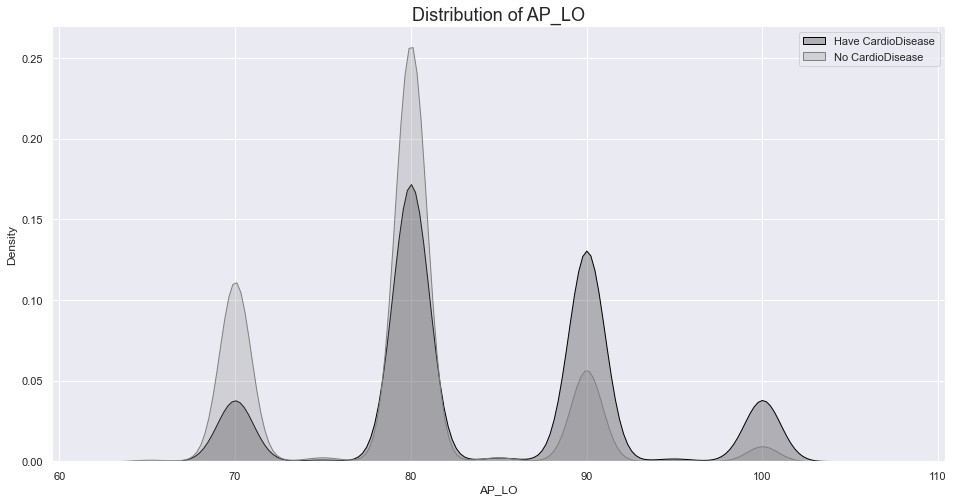

In [54]:
biNumAnalysis('AP_LO',df)

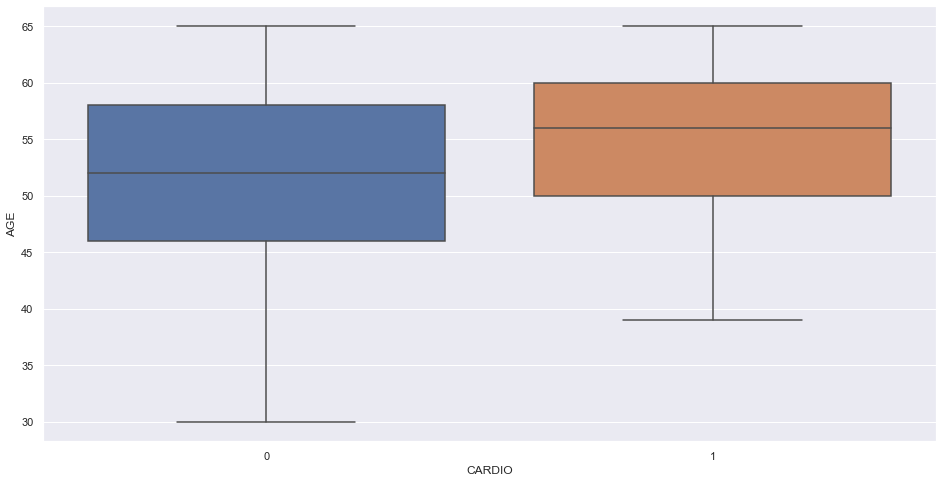

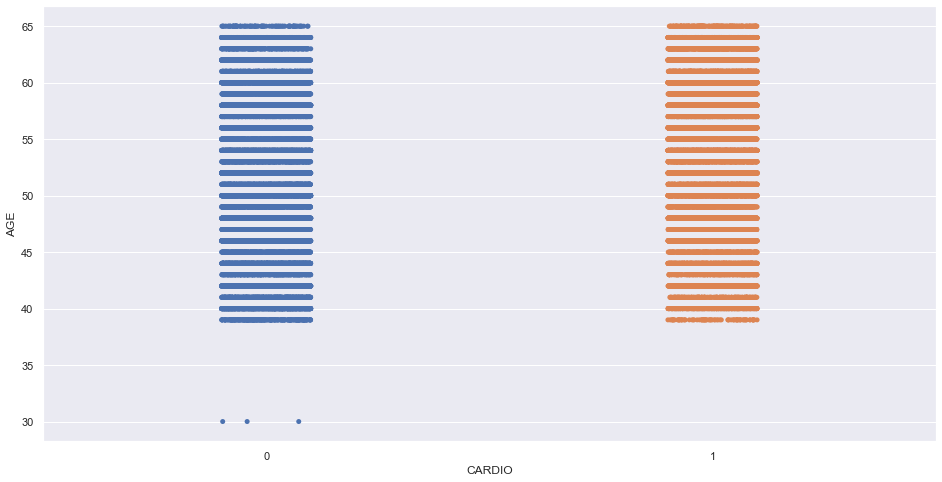

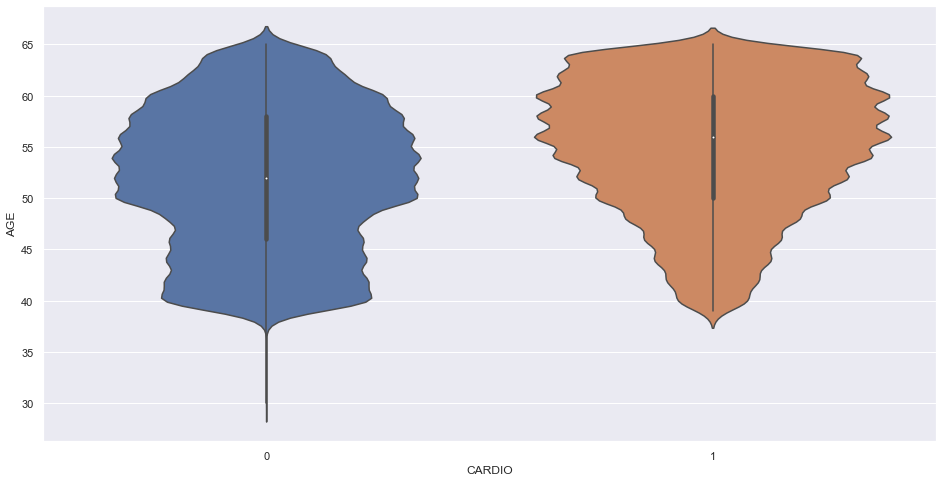

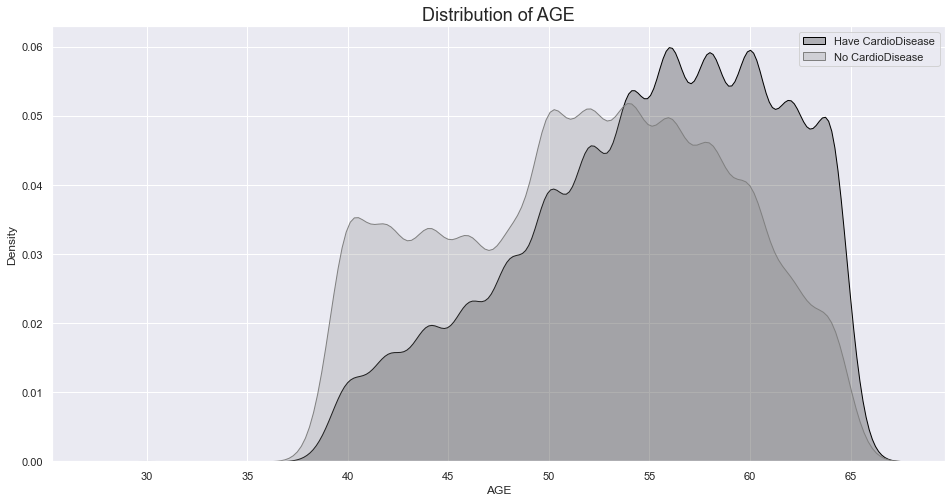

In [55]:
biNumAnalysis('AGE',df)

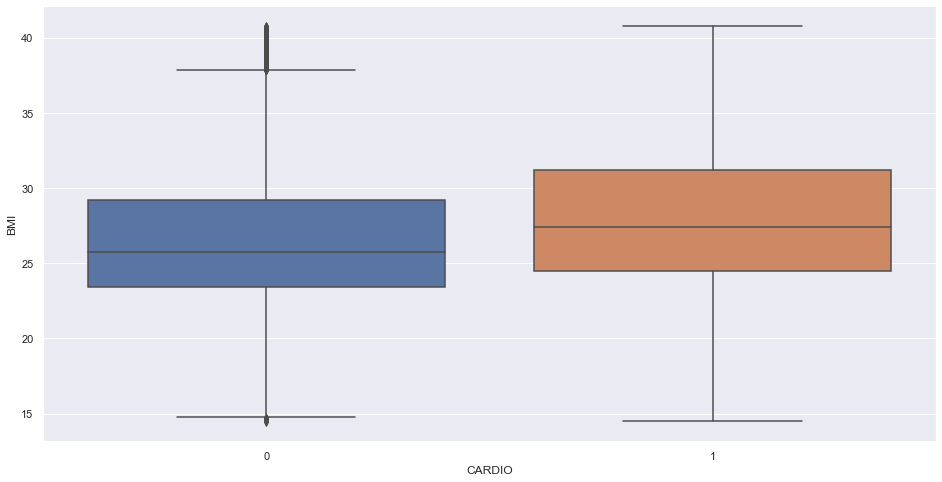

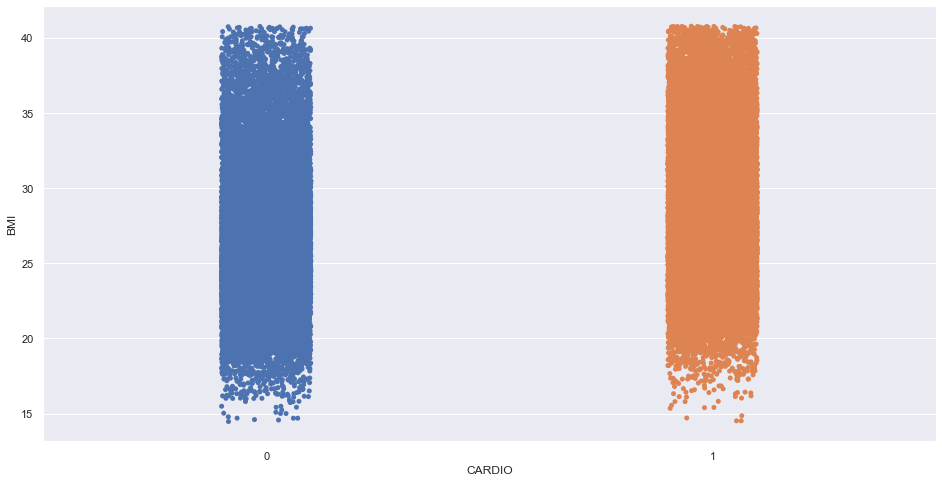

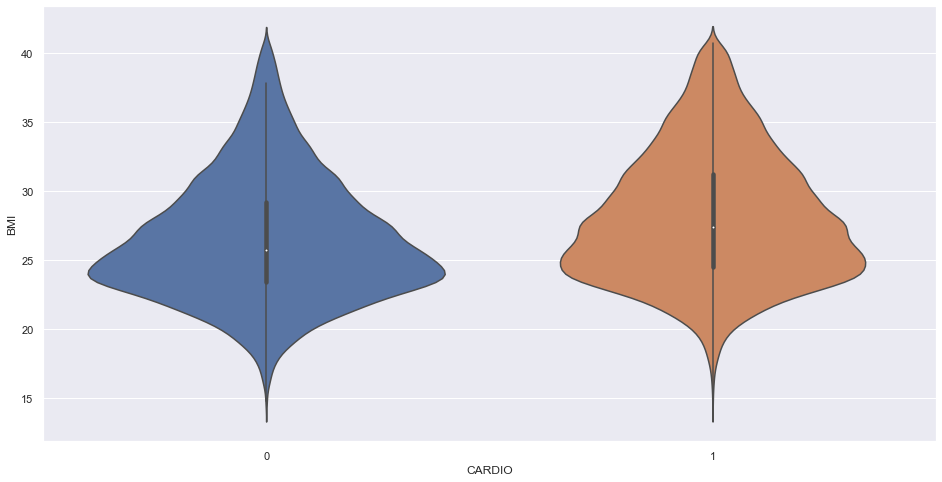

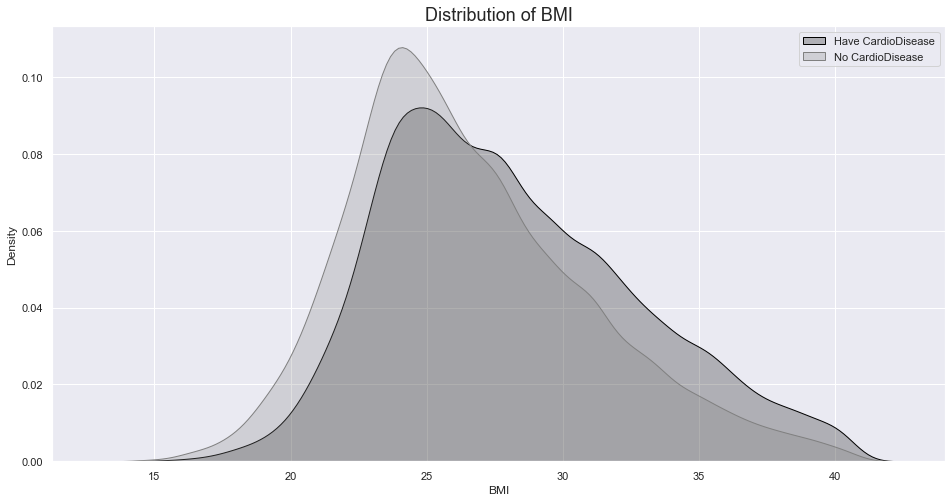

In [56]:
biNumAnalysis('BMI',df)

In [85]:
#Data Reprocessing and Encoding 
#No need to downsample/upsample response variable CARDIO as data is balanced out evenly

df_clean = pd.read_csv('cardio_train_clean.csv')

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#Extract out the categorical variables for one hot encoding, except the response 'CARDIO'
df_cat = df_clean[['CHOLESTEROL', 'GLUC']]

#One Hot Encoding
ohe.fit(df_cat)

#Create OHE categorical variables dataframe
df_cat_ohe = pd.DataFrame(ohe.transform(df_cat).toarray(), columns = ohe.get_feature_names_out(df_cat.columns))

#Make column names neater
df_cat_ohe.columns = df_cat_ohe.columns.str.replace(" ", "_")
df_cat_ohe.columns = df_cat_ohe.columns.str.replace("-", "_")
df_cat_ohe.columns = df_cat_ohe.columns.str.upper()
df_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56744 entries, 0 to 56743
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CHOLESTEROL_ABOVE_NORMAL       56744 non-null  float64
 1   CHOLESTEROL_NORMAL             56744 non-null  float64
 2   CHOLESTEROL_WELL_ABOVE_NORMAL  56744 non-null  float64
 3   GLUC_ABOVE_NORMAL              56744 non-null  float64
 4   GLUC_NORMAL                    56744 non-null  float64
 5   GLUC_WELL_ABOVE_NORMAL         56744 non-null  float64
dtypes: float64(6)
memory usage: 2.6 MB


In [58]:
#Combining the variables that have the highest correlation to CARDIO into 1 final dataframe for machine learning
df_num = df_clean[['AGE','BMI', 'AP_LO', 'AP_HI']]
df_responseVar = df_clean[['CARDIO']]
df_final = pd.concat([df_num, df_cat_ohe, df_responseVar], sort = False, axis = 1).reindex(df_num.index)
df_final

,AGE,BMI,AP_LO,AP_HI,CHOLESTEROL_ABOVE_NORMAL,CHOLESTEROL_NORMAL,CHOLESTEROL_WELL_ABOVE_NORMAL,GLUC_ABOVE_NORMAL,GLUC_NORMAL,GLUC_WELL_ABOVE_NORMAL,CARDIO
0,50,21.967120,80.0,110.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,55,34.927679,90.0,140.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,52,23.507805,70.0,130.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,48,28.710479,100.0,150.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,60,29.384676,80.0,120.0,1.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
56739,54,23.661439,90.0,130.0,0.0,1.0,0.0,0.0,1.0,0.0,1
56740,58,29.384757,80.0,150.0,0.0,1.0,0.0,0.0,1.0,0.0,1
56741,53,26.927438,80.0,120.0,0.0,1.0,0.0,0.0,1.0,0.0,0
56742,61,27.099251,80.0,135.0,0.0,1.0,0.0,1.0,0.0,0.0,1


## MACHINE LEARNING

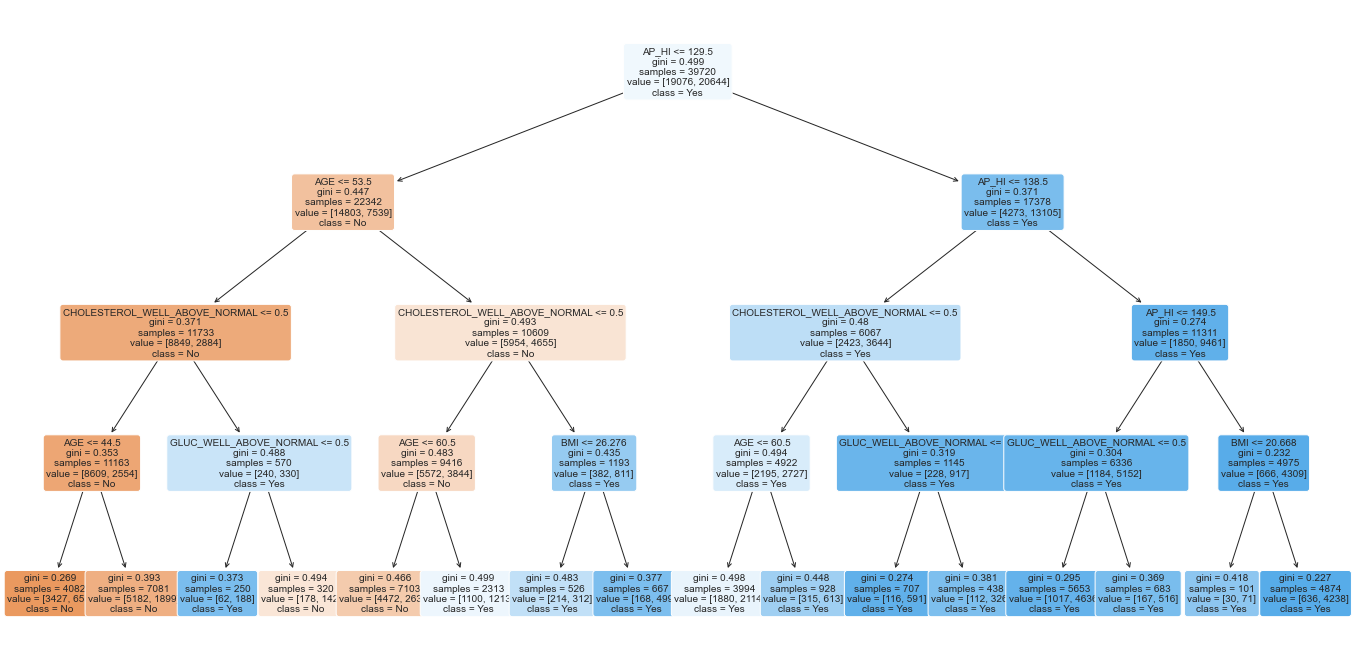

In [59]:
# Extract Response and Predictors
y = pd.DataFrame(df_final['CARDIO'])
X = pd.DataFrame(df_final.drop('CARDIO', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  #change max_depth to experiment
dectree.fit(X_train, y_train)                    #train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["No","Yes"], fontsize=10)
plt.savefig('dec_tree', dpi=100)
plt.show()

In [60]:
def calculateF1Positive (TP, TN, FP, FN):
    F1= TP/(TP+0.5*(FP+FN))
    return F1

def calculateF1Negative(TP, TN, FP, FN):
    F1=TN/(TN+0.5*(FP+FN))
    return F1

Train Data
Accuracy  :	 0.7194360523665659

TPR Train :	 0.7419589226894012
TNR Train :	 0.6950618578318306

FPR Train :	 0.30493814216816945
FNR Train :	 0.2580410773105987

F1 PR: 	 0.7332567379960745
F1 NR: 	 0.7041049333545749


<AxesSubplot:>

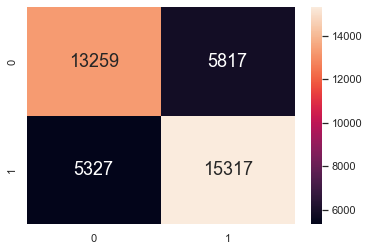

In [61]:
#Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

#Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

#Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] #True Positives : Yes (1) predicted Yes (1)
fpTrain = cmTrain[0][1] #False Positives : No (0) predicted Yes (1)
tnTrain = cmTrain[0][0] #True Negatives : No (0) predicted No (0)
fnTrain = cmTrain[1][0] #False Negatives : Yes (1) predicted No (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

#F1 from 0-1, 1 best
print("F1 PR: \t", calculateF1Positive(tpTrain, tnTrain, fpTrain, fnTrain))    
print("F1 NR: \t", calculateF1Negative(tpTrain, tnTrain, fpTrain, fnTrain))

#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7112312030075187

TPR Test :	 0.7311864406779661
TNR Test :	 0.6896256422804012

FPR Test :	 0.3103743577195987
FNR Test :	 0.2688135593220339

F1 PR: 	 0.7247172135737484
F1 NR: 	 0.6963557751698579


<AxesSubplot:>

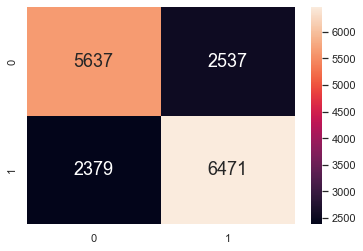

In [62]:
#Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

#Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

#Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] #True Positives : Yes (1) predicted Yes (1)
fpTest = cmTest[0][1] #False Positives : No (0) predicted Yes (1)
tnTest = cmTest[0][0] #True Negatives : No (0) predicted No (0)
fnTest = cmTest[1][0] #False Negatives : Yes (1) predicted No (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
print()

#F1 from 0-1, 1 best
print("F1 PR: \t", calculateF1Positive(tpTest, tnTest, fpTest, fnTest))    
print("F1 NR: \t", calculateF1Negative(tpTest, tnTest, fpTest, fnTest))

#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Random Forest

In [63]:
#Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  #n_estimators denote number of trees
                                 max_depth = 4)       #sets the maximum depth of each tree

#Fit Random Forest on Train Data
rforest.fit(X_train, y_train.CARDIO.ravel())

RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.7177995971802619

TPR Train :	 0.6870761480333268
TNR Train :	 0.7510484378276369

FPR Train :	 0.24895156217236317
FNR Train :	 0.3129238519666731

F1 PR: 	 0.7167799479495667
F1 NR: 	 0.7188119308632065


<AxesSubplot:>

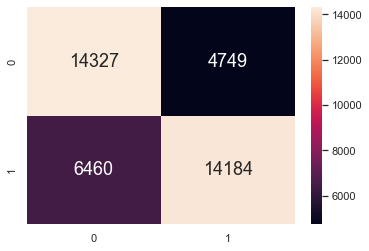

In [64]:
#Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

#Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

#Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] #True Positives : Yes (1) predicted Yes (1)
fpTrain = cmTrain[0][1] #False Positives : No (0) predicted Yes (1)
tnTrain = cmTrain[0][0] #True Negatives : No (0) predicted No (0)
fnTrain = cmTrain[1][0] #False Negatives : Yes (1) predicted No (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

#F1 from 0-1, 1 best
print("F1 PR: \t", calculateF1Positive(tpTrain, tnTrain, fpTrain, fnTrain))    
print("F1 NR: \t", calculateF1Negative(tpTrain, tnTrain, fpTrain, fnTrain))

#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7100563909774437

TPR Test :	 0.6732203389830509
TNR Test :	 0.749938830437974

FPR Test :	 0.25006116956202595
FNR Test :	 0.32677966101694916

F1 PR: 	 0.7070970804652267
F1 NR: 	 0.7129565015119795


<AxesSubplot:>

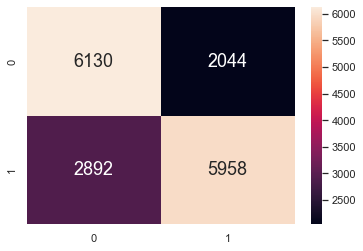

In [65]:
#Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

#Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

#Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] #True Positives : Yes (1) predicted Yes (1)
fpTest = cmTest[0][1] #False Positives : No (0) predicted Yes (1)
tnTest = cmTest[0][0] #True Negatives : No (0) predicted No (0)
fnTest = cmTest[1][0] #False Negatives : Yes (1) predicted No (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
print()

#F1 from 0-1, 1 best
print("F1 PR: \t", calculateF1Positive(tpTest, tnTest, fpTest, fnTest))    
print("F1 NR: \t", calculateF1Negative(tpTest, tnTest, fpTest, fnTest))

#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [66]:
#Import GridSearch for Hyper-parameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

#Define the Hyper-parameter Grid to search on, in the case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   #number of trees between 100 and 1000
              'max_depth': np.arange(2, 11)}             #depth of trees between 2 and 10 
                                                         #Too much may lead to overfitting

#Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   #the model family
                      param_grid,                 #the search grid
                      cv = 3,                     #3-fold cross-validation
                      scoring = 'accuracy',       #score to evaluate
                      n_jobs= -1)       

#Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.CARDIO.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [67]:
#Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

#Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=9, n_estimators=1000)
0.7243454179254784


In [77]:
#Extract Response and Predictors
y = pd.DataFrame(df_final['CARDIO'])
X = pd.DataFrame(df_final.drop('CARDIO', axis = 1))

#Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,   #found using GridSearchCV
                                 max_depth = 9)       #found using GridSearchCV

#Fit Random Forest on Train Data
rforest.fit(X_train, y_train.CARDIO.ravel())

RandomForestClassifier(max_depth=9, n_estimators=1000)

Train Data
Accuracy  :	 0.7335095669687814

TPR Train :	 0.6912845811568968
TNR Train :	 0.7793530770846461

FPR Train :	 0.22064692291535393
FNR Train :	 0.3087154188431031

F1 PR: 	 0.7297745781317811
F1 NR: 	 0.737142715240011


<AxesSubplot:>

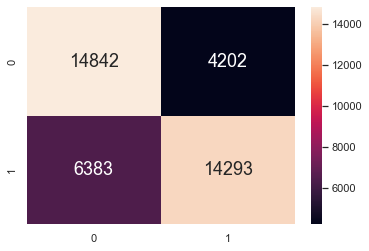

In [78]:
#Predict the Response corresponding to Predictors      
#For train data
y_train_pred = rforest.predict(X_train)

#Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

#Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] #True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] #False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] #True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] #False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

#F1 from 0-1, 1 best
print("F1 PR: \t", calculateF1Positive(tpTrain, tnTrain, fpTrain, fnTrain))  
print("F1 NR: \t", calculateF1Negative(tpTrain, tnTrain, fpTrain, fnTrain))

#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


Test Data
Accuracy  :	 0.7239191729323309

TPR Test :	 0.6898389657518712
TNR Test :	 0.7605410675115769

FPR Test :	 0.2394589324884231
FNR Test :	 0.31016103424812885

F1 PR: 	 0.7213328590062849
F1 NR: 	 0.7264579210802002


<AxesSubplot:>

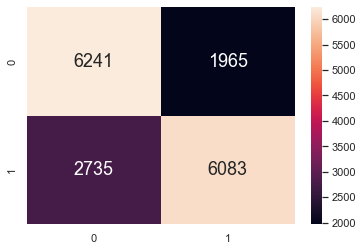

In [79]:
#Predict the Response corresponding to Predictors        
#For test data
y_test_pred = rforest.predict(X_test)

#Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

#Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] #True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] #False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] #True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] #False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
print()

#F1 from 0-1, 1 best
print("F1 PR: \t", calculateF1Positive(tpTest, tnTest, fpTest, fnTest))    
print("F1 NR: \t", calculateF1Negative(tpTest, tnTest, fpTest, fnTest))

#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Random Forest to predict best indicator(s)

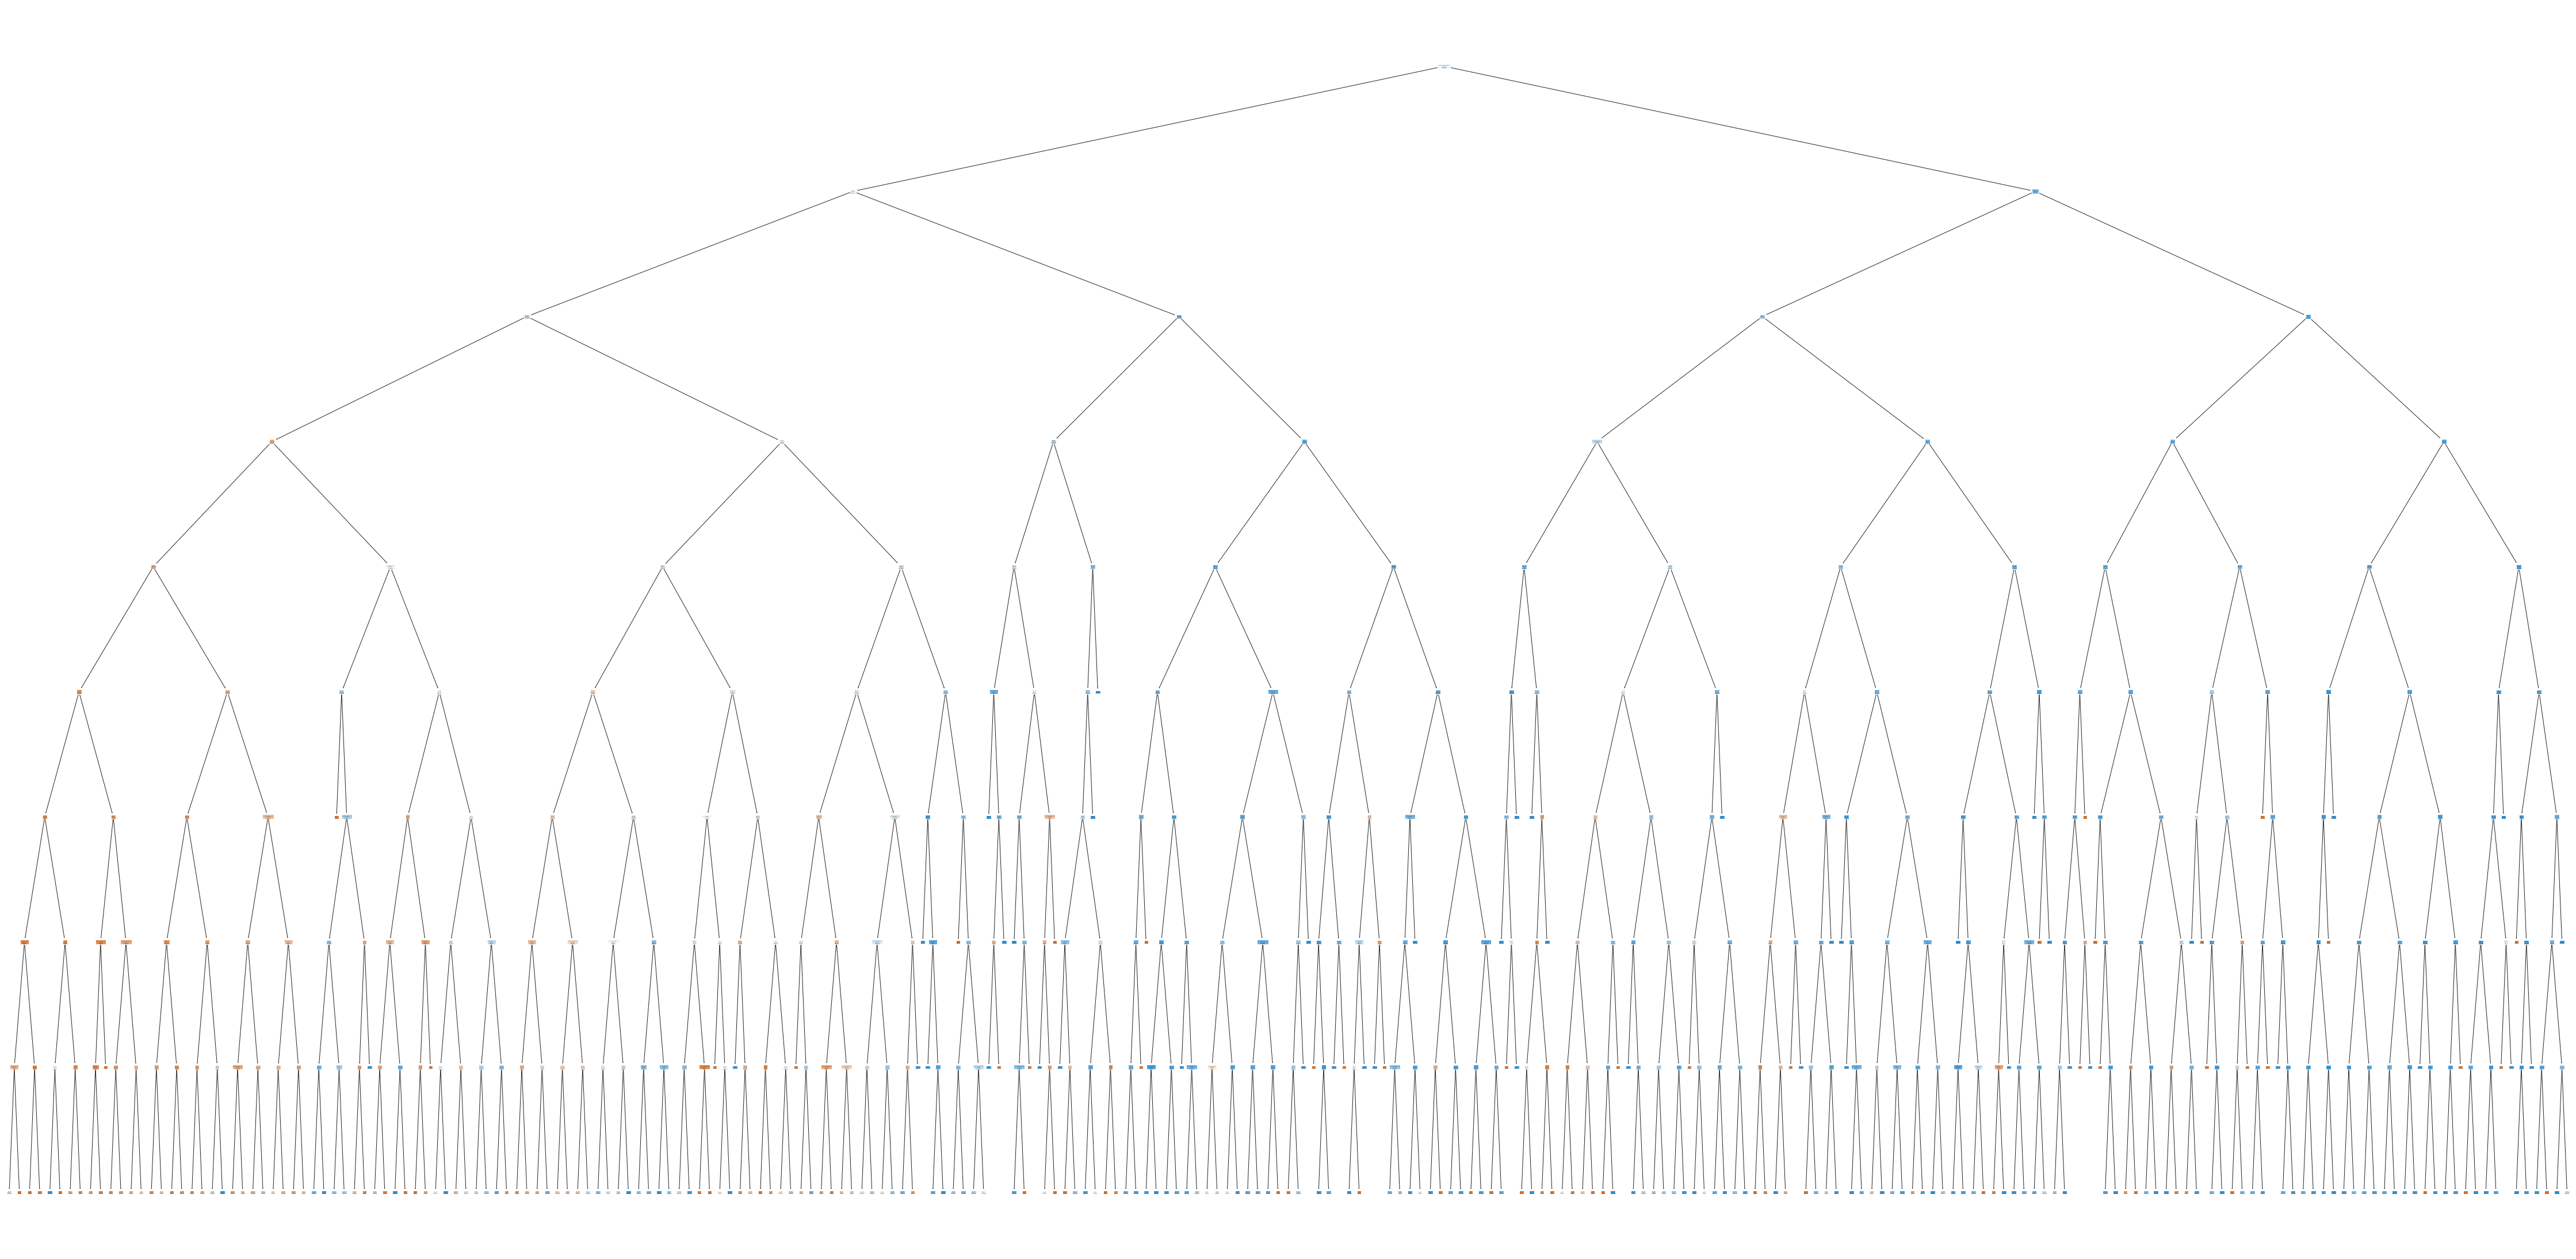

In [80]:
plt.figure(figsize=(80,40))
plot_tree(hpGrid.best_estimator_[5], feature_names = X.columns,class_names=["Disease", "No Disease"],filled=True);

In [81]:
#Rank importance of the factors
hpGrid.best_estimator_.feature_importances_

imp_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Imp": hpGrid.best_estimator_.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Variable,Imp
3,AP_HI,0.493667
2,AP_LO,0.189184
0,AGE,0.127637
1,BMI,0.069234
6,CHOLESTEROL_WELL_ABOVE_NORMAL,0.054138
5,CHOLESTEROL_NORMAL,0.039912
4,CHOLESTEROL_ABOVE_NORMAL,0.010133
9,GLUC_WELL_ABOVE_NORMAL,0.007219
8,GLUC_NORMAL,0.005889
7,GLUC_ABOVE_NORMAL,0.002987


#### Logistic Regression

In [82]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#logreg = LogisticRegression(solver='lbfgs', max_iter=300)
logreg = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
logreg.fit(X_train, y_train.CARDIO.ravel())

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

Train Data
Accuracy  :	 0.7179758308157099

TPR Train :	 0.6914991523371277
TNR Train :	 0.7466317169069463

FPR Train :	 0.25336828309305376
FNR Train :	 0.3085008476628724

F1 PR: 	 0.7182170347637974
F1 NR: 	 0.7177342135765761


<AxesSubplot:>

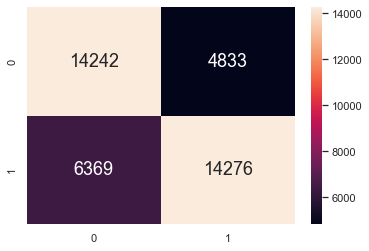

In [83]:
#Predict the Response corresponding to Predictors
y_train_pred = logreg.predict(X_train)

#Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", logreg.score(X_train, y_train))
print()

#Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] #True Positives : Yes (1) predicted Yes (1)
fpTrain = cmTrain[0][1] #False Positives : No (0) predicted Yes (1)
tnTrain = cmTrain[0][0] #True Negatives : No (0) predicted No (0)
fnTrain = cmTrain[1][0] #False Negatives : Yes (1) predicted No (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

#F1 from 0-1, 1 best
print("F1 PR: \t", calculateF1Positive(tpTrain, tnTrain, fpTrain, fnTrain))  
print("F1 NR: \t", calculateF1Negative(tpTrain, tnTrain, fpTrain, fnTrain))

#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7141682330827067

TPR Test :	 0.6839190869024748
TNR Test :	 0.7469113149847095

FPR Test :	 0.2530886850152905
FNR Test :	 0.3160809130975251

F1 PR: 	 0.7132586918090749
F1 NR: 	 0.7150720224850685


<AxesSubplot:>

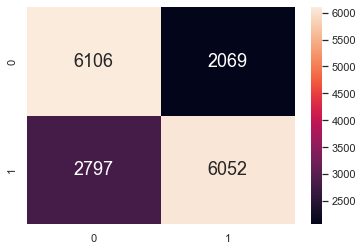

In [84]:
#Predict the Response corresponding to Predictors        
#For test data
y_test_pred = logreg.predict(X_test)

#Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", logreg.score(X_test, y_test))
print()

#Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] #True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] #False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] #True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] #False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
print()

#F1 from 0-1, 1 best
print("F1 PR: \t", calculateF1Positive(tpTest, tnTest, fpTest, fnTest))    
print("F1 NR: \t", calculateF1Negative(tpTest, tnTest, fpTest, fnTest))

#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})